In [1]:
# Set up Spark Config FIRST
storage_account_name = "team4storage"
storage_account_key = "cqzd7Fys8ii2ocJXH4eZA1P+1LKHbgvzOYtx55kqDmsL3fck8ggndqsuch8Mdh0YUDHBhqr6uyQD+ASttatJWA=="
container_name = "team4container"

spark.conf.set(
    f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net",
    storage_account_key
)

# Use wasbs:// instead of abfss://
Boston_folder_path = "Gold/ModelDataFiles/BostonModelData_withLags"
Houston_folder_path = "Gold/ModelDataFiles/HoustonModelData_withLags"

# Read using wasbs
boston_df = spark.read.parquet(f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/{Boston_folder_path}")
houston_df = spark.read.parquet(f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/{Houston_folder_path}")

StatementMeta(sparkpool, 14, 2, Finished, Available, Finished)

In [2]:
boston_df.printSchema()

StatementMeta(sparkpool, 14, 3, Finished, Available, Finished)

root
 |-- Location: string (nullable = true)
 |-- ed_trends_influenza: string (nullable = true)
 |-- ed_trends_rsv: string (nullable = true)
 |-- week_end: timestamp (nullable = true)
 |-- total_visits_influenza: integer (nullable = true)
 |-- total_visits_rsv: integer (nullable = true)
 |-- total_visits_smoothed_combined: double (nullable = true)
 |-- total_visits_smoothed_influenza: double (nullable = true)
 |-- total_visits_smoothed_rsv: double (nullable = true)
 |-- high_visits_influenza: integer (nullable = true)
 |-- high_visits_rsv: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- avg_co: double (nullable = true)
 |-- avg_no2: double (nullable = true)
 |-- avg_o3: double (nullable = true)
 |-- avg_so2: double (nullable = true)
 |-- avg_pm2_5: double (nullable = true)
 |-- avg_pm10: double (nullable = true)
 |-- avg_us_aqi: double (nullable = true)
 |-- high_pollution_events: long (nullable = true)
 |-- avg_pm2_5_lag1: double (nullable = true)
 |-- avg_pm2_5_

In [3]:
import pandas as pd

# Step 1: List all variables you want to include
all_columns = [
    "date", "week_end", "Location",
    
    # Hospitalization totals
    "total_visits_influenza", "total_visits_rsv",
    "total_visits_smoothed_combined", "total_visits_smoothed_influenza", "total_visits_smoothed_rsv",
    "high_visits_influenza", "high_visits_rsv",

    # Pollutant averages
    "avg_co", "avg_no2", "avg_o3", "avg_so2",
    "avg_pm2_5", "avg_pm10", "avg_us_aqi",
    "high_pollution_events",

    # AQI and pollutants - lagged (1 to 3 weeks)
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3",

    # Optional: hospitalization_effective_date (if relevant)
    "hospitalization_effective_date"
]

# Step 2: Select and convert to Pandas
boston_pd = boston_df.select(all_columns).toPandas()

# Step 3: Clean up
boston_pd["date"] = pd.to_datetime(boston_pd["date"])
boston_pd = boston_pd.sort_values("date").reset_index(drop=True)


StatementMeta(sparkpool, 14, 4, Finished, Available, Finished)

StatementMeta(sparkpool, 14, 34, Finished, Available, Finished)

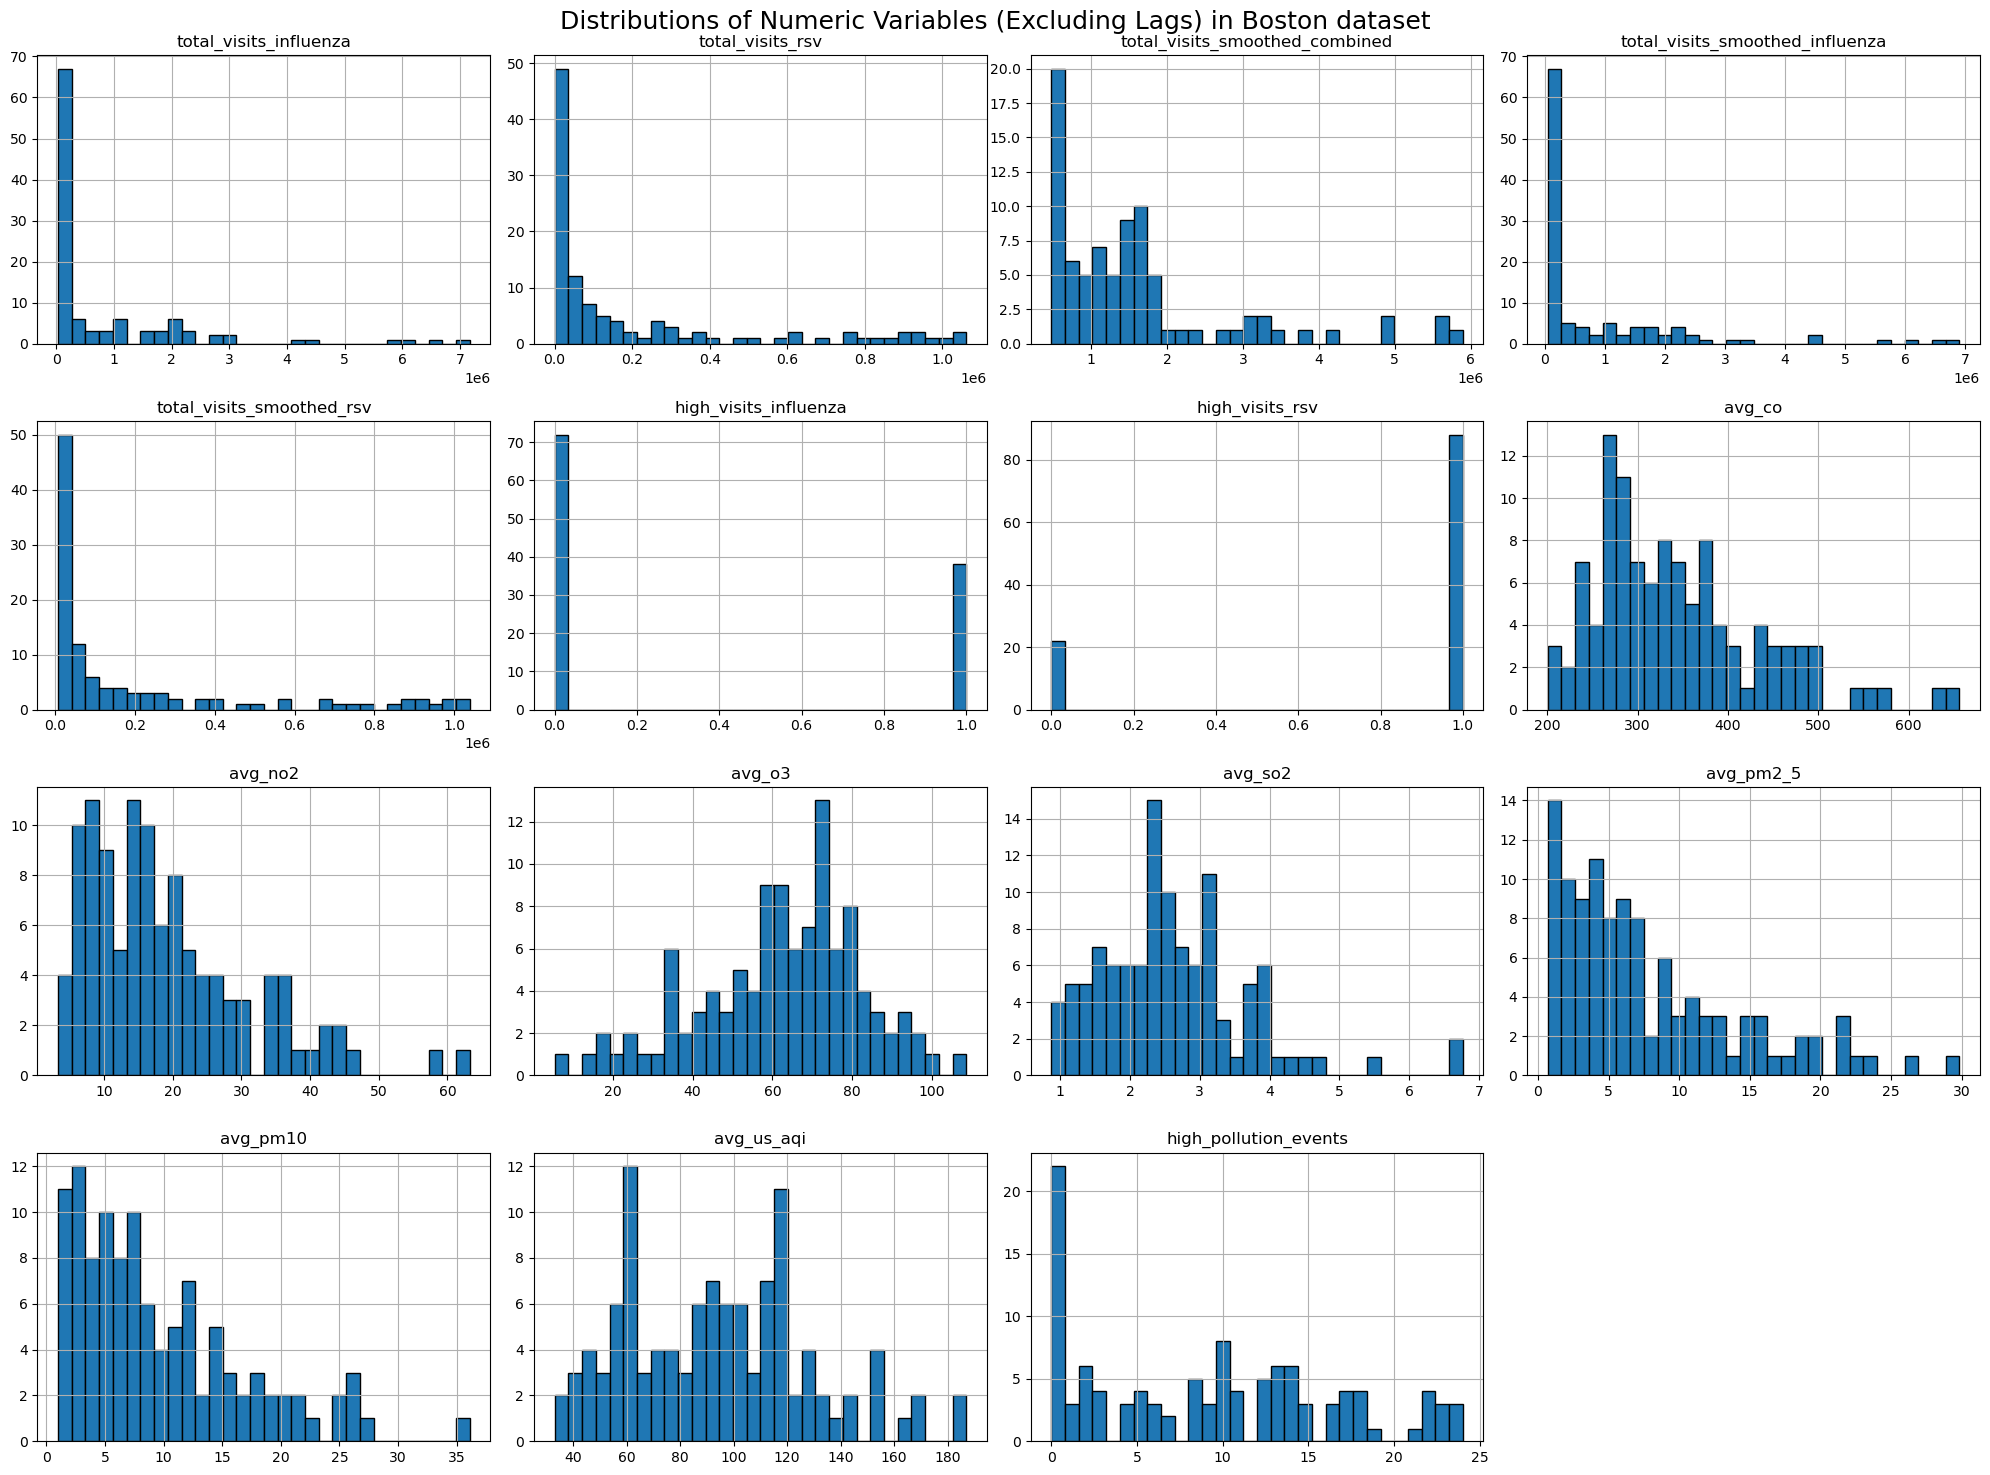

In [33]:
import matplotlib.pyplot as plt

# Step 1: Get all numeric columns
numeric_columns = boston_pd.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Step 2: Exclude lag variables
filtered_columns = [
    "total_visits_influenza",
"total_visits_rsv",
"total_visits_smoothed_combined",
"total_visits_smoothed_influenza",
"total_visits_smoothed_rsv",
"high_visits_influenza",
"high_visits_rsv",
"avg_co",
"avg_no2",
"avg_o3",
"avg_so2",
"avg_pm2_5",
"avg_pm10",
"avg_us_aqi",
"high_pollution_events"
]


# Step 3: Plot histograms
boston_pd[filtered_columns].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distributions of Numeric Variables (Excluding Lags) in Boston dataset", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


StatementMeta(sparkpool, 14, 9, Finished, Available, Finished)

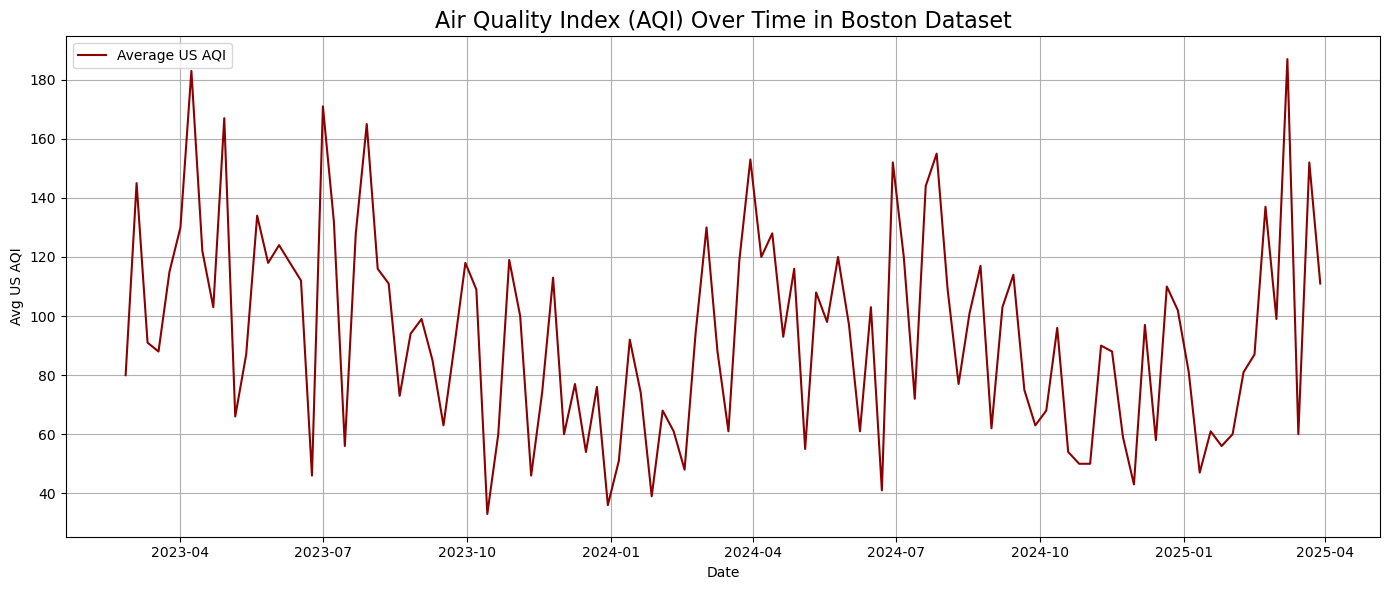

In [8]:
import matplotlib.pyplot as plt

# Make sure 'date' is a datetime and data is sorted
boston_pd["date"] = pd.to_datetime(boston_pd["date"])
boston_pd = boston_pd.sort_values("date")

# Replace zeros with NaN (if not already done)
import numpy as np
boston_pd["avg_us_aqi"] = boston_pd["avg_us_aqi"].replace(0, np.nan)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(boston_pd["date"], boston_pd["avg_us_aqi"], color="darkred", label="Average US AQI")
plt.title("Air Quality Index (AQI) Over Time in Boston Dataset", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Avg US AQI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


StatementMeta(sparkpool, 14, 35, Finished, Available, Finished)

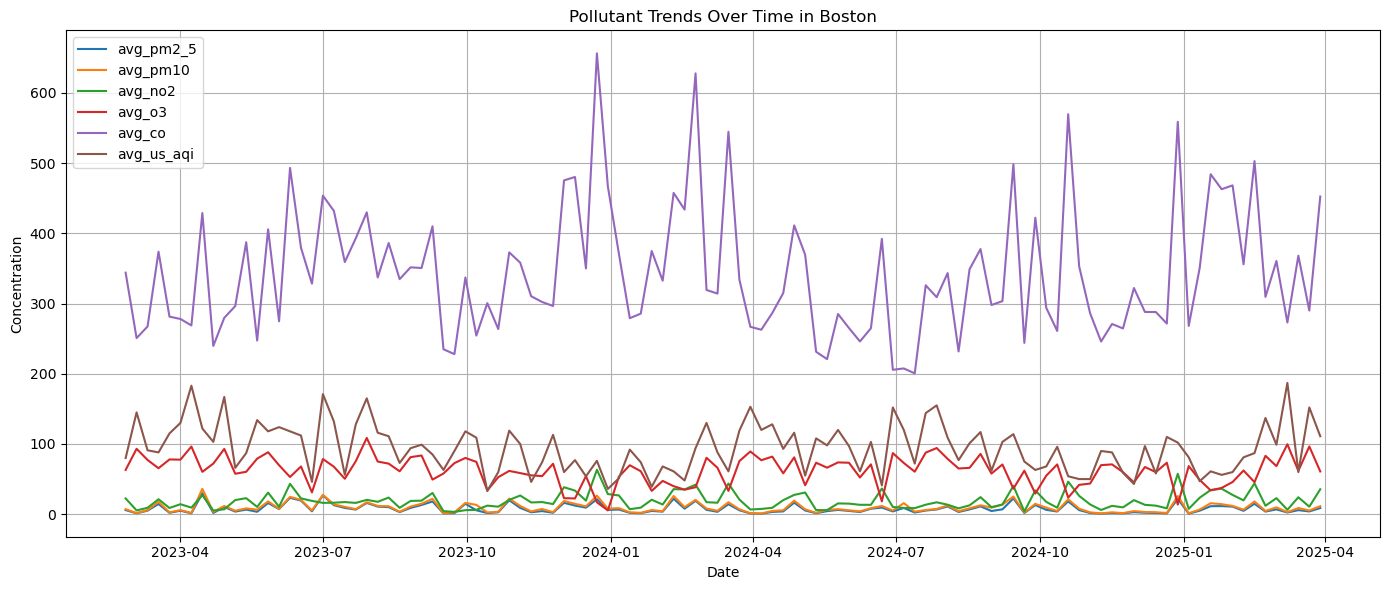

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for col in ["avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_co", "avg_us_aqi"]:
    plt.plot(boston_pd["date"], boston_pd[col], label=col)

plt.title("Pollutant Trends Over Time in Boston")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

StatementMeta(sparkpool, 14, 11, Finished, Available, Finished)

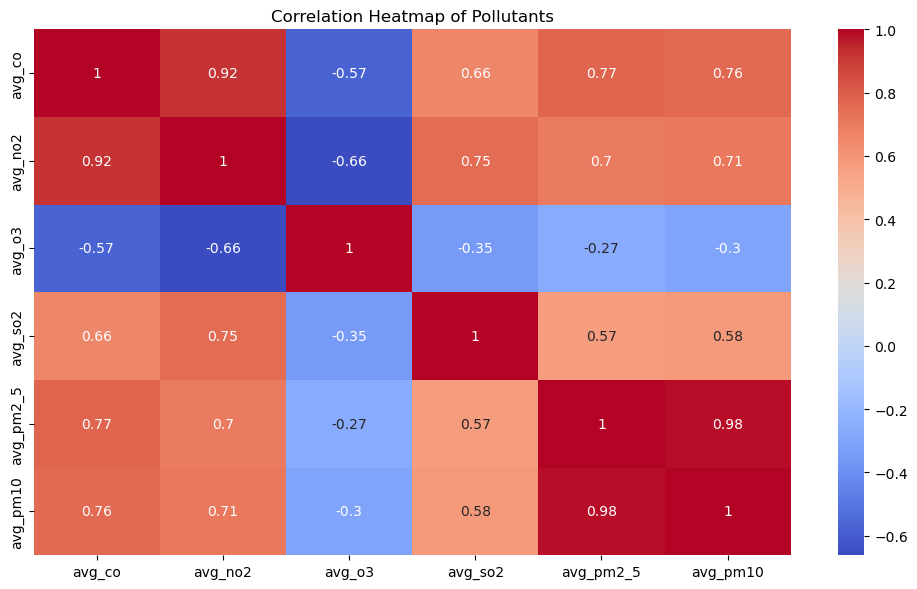

In [10]:
import seaborn as sns

# Select only pollutant columns
pollutant_only = boston_pd[[
    "avg_co", "avg_no2", "avg_o3", "avg_so2",
    "avg_pm2_5", "avg_pm10"
]]

plt.figure(figsize=(10, 6))
sns.heatmap(pollutant_only.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants (Boston)")
plt.tight_layout()
plt.show()


StatementMeta(sparkpool, 14, 12, Finished, Available, Finished)

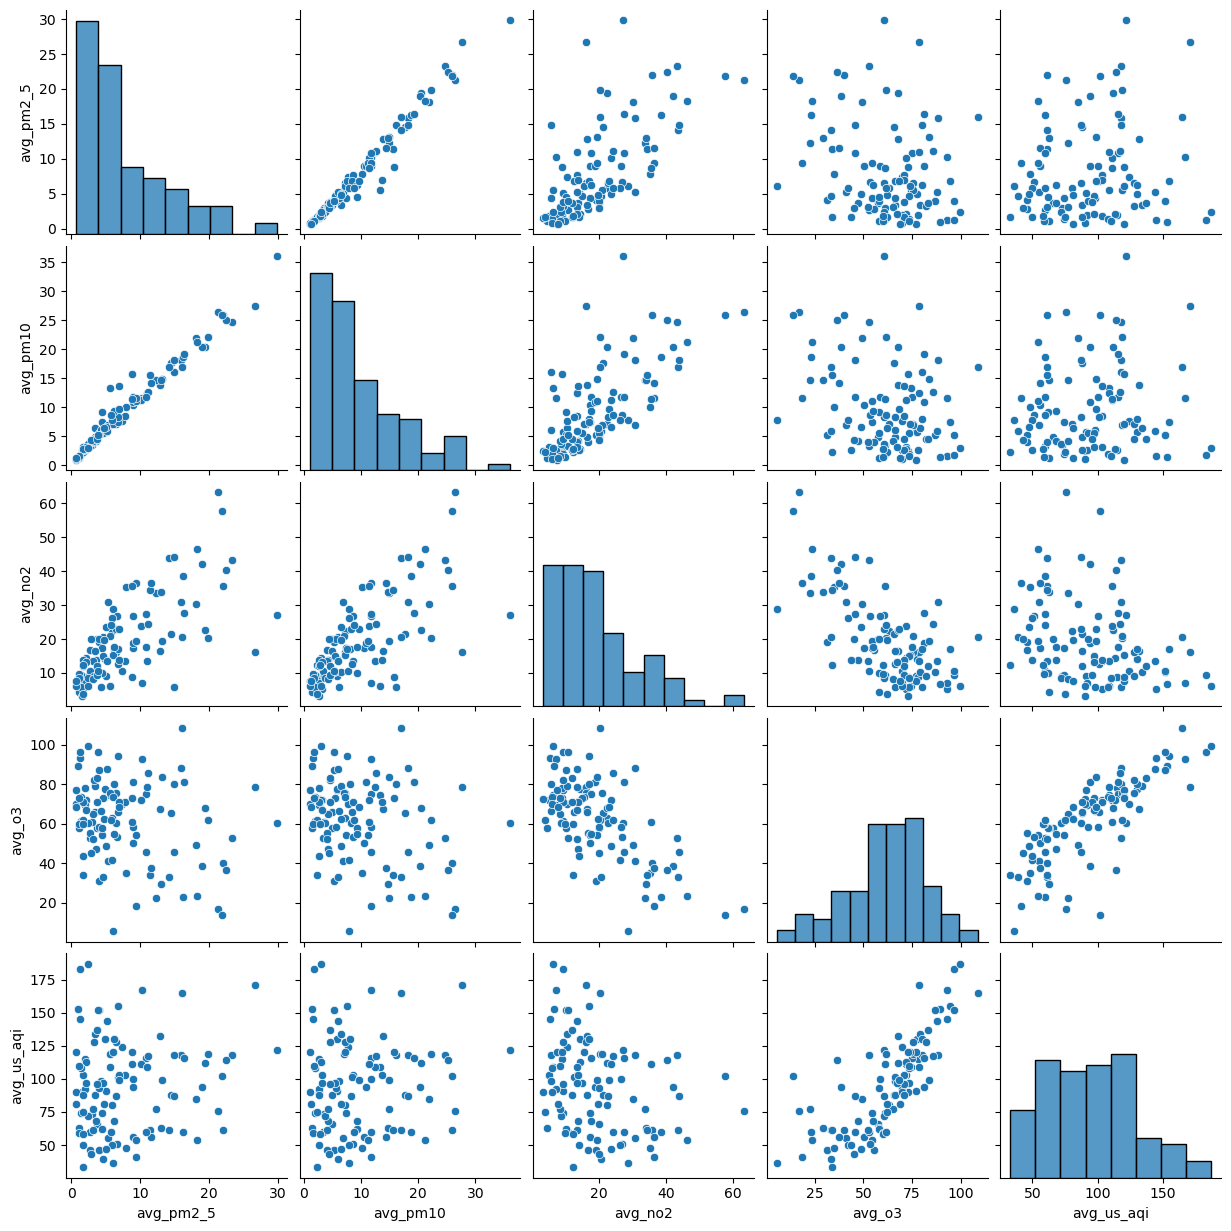

In [11]:
sns.pairplot(boston_pd[[
    "avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_us_aqi"
]])


StatementMeta(sparkpool, 14, 39, Finished, Available, Finished)

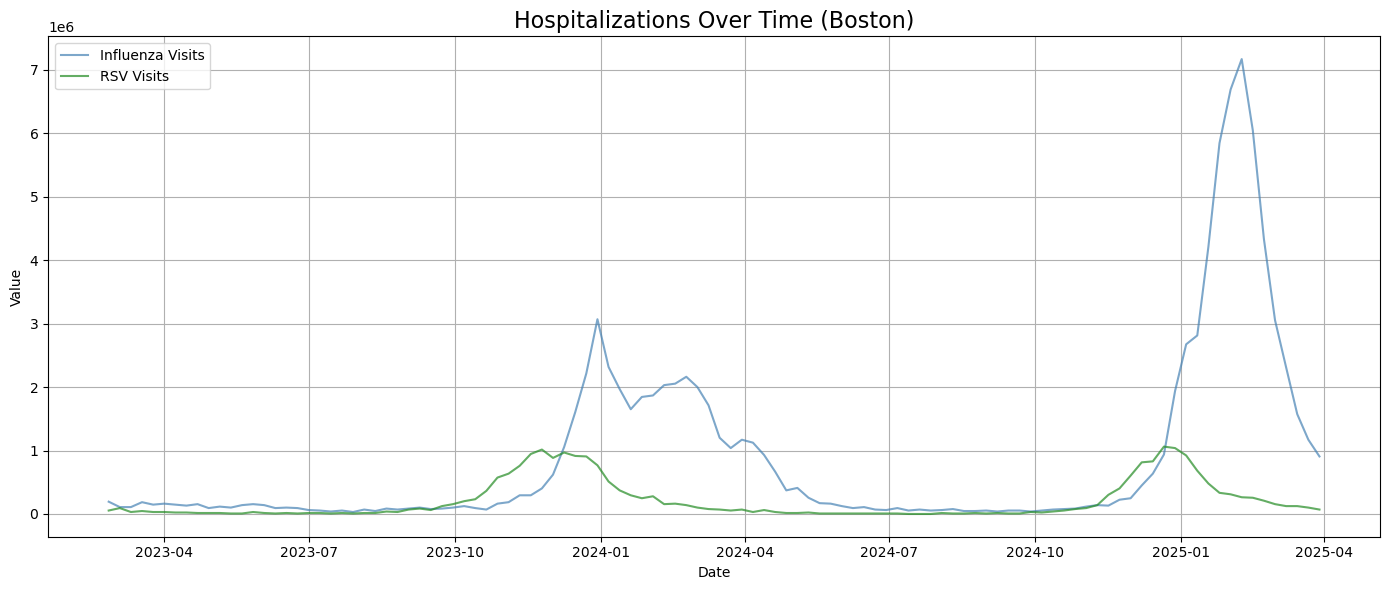

In [38]:
import matplotlib.pyplot as plt
import pandas as pd


# Ensure date is in datetime format and sorted
boston_pd["date"] = pd.to_datetime(boston_pd["date"])
boston_pd = boston_pd.sort_values("date")

# Plot
plt.figure(figsize=(14, 6))

plt.plot(boston_pd["date"], boston_pd["total_visits_influenza"], label="Influenza Visits", color="steelblue", alpha=0.7)
plt.plot(boston_pd["date"], boston_pd["total_visits_rsv"], label="RSV Visits", color="forestgreen", alpha=0.7)

plt.title("Hospitalizations Over Time (Boston)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


StatementMeta(sparkpool, 14, 42, Finished, Available, Finished)

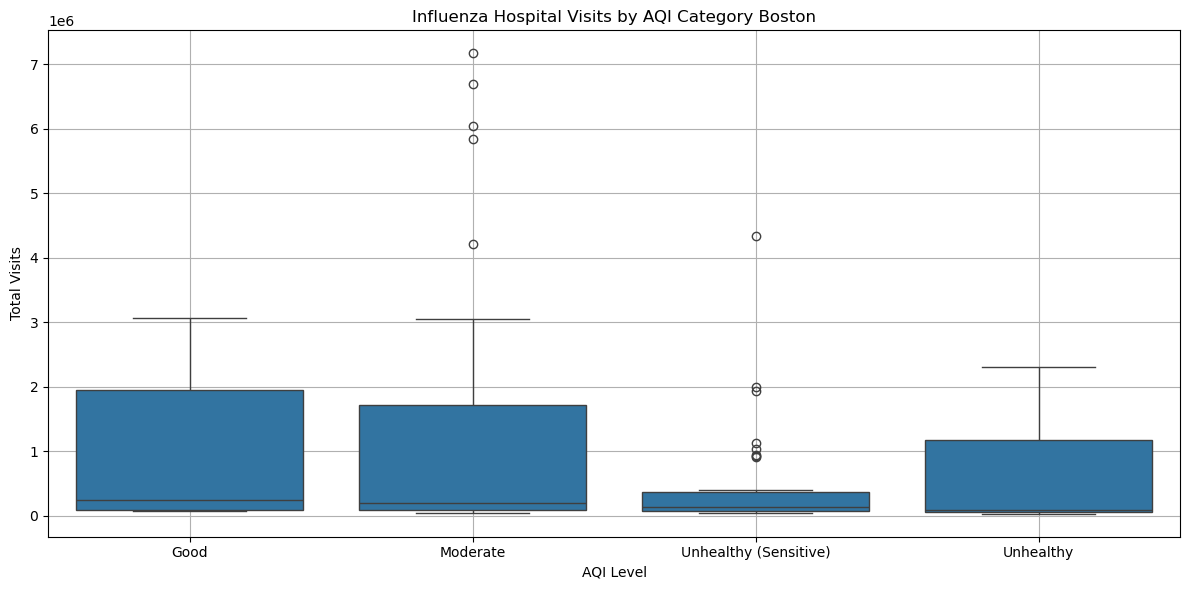

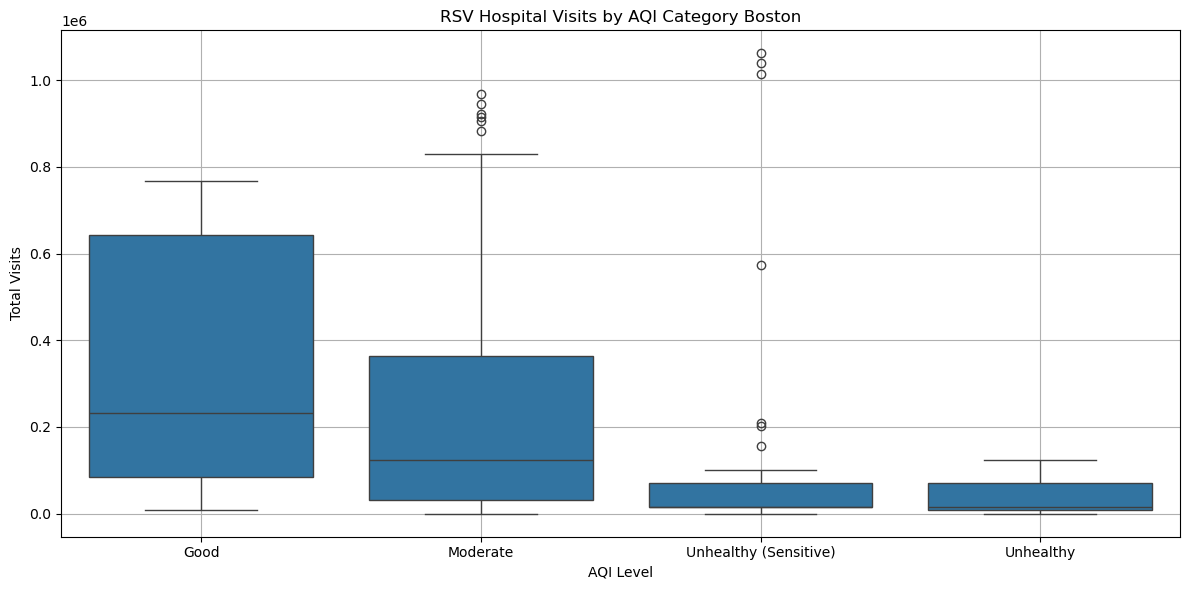

In [41]:
def categorize_aqi(aqi):
    if pd.isna(aqi): return "Missing"
    elif aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy (Sensitive)"
    else: return "Unhealthy"

boston_pd["AQI_Level"] = boston_pd["avg_us_aqi"].apply(categorize_aqi)

plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="AQI_Level", y="total_visits_influenza", order=["Good", "Moderate", "Unhealthy (Sensitive)", "Unhealthy"])
plt.title("Influenza Hospital Visits by AQI Category Boston")
plt.ylabel("Total Visits")
plt.xlabel("AQI Level")
plt.grid(True)
plt.tight_layout()
plt.show()

# Repeat for RSV
plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="AQI_Level", y="total_visits_rsv", order=["Good", "Moderate", "Unhealthy (Sensitive)", "Unhealthy"])
plt.title("RSV Hospital Visits by AQI Category Boston")
plt.ylabel("Total Visits")
plt.xlabel("AQI Level")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
lag_variables = [
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3"
]
# Include the target variables too
columns_to_fetch = lag_variables + ["total_visits_influenza", "total_visits_rsv"]

# Convert to Pandas
lags_pd = boston_df.select(columns_to_fetch).toPandas()

# Calculate correlations between weekly lags and current hospitalizations
correlation_data = {
    "Lag (Weeks)": [1, 2, 3],
    "Influenza Corr": [
        lags_pd["avg_us_aqi_lag1"].corr(lags_pd["total_visits_influenza"]),
        lags_pd["avg_us_aqi_lag2"].corr(lags_pd["total_visits_influenza"]),
        lags_pd["avg_us_aqi_lag3"].corr(lags_pd["total_visits_influenza"])
    ],
    "RSV Corr": [
        lags_pd["avg_us_aqi_lag1"].corr(lags_pd["total_visits_rsv"]),
        lags_pd["avg_us_aqi_lag2"].corr(lags_pd["total_visits_rsv"]),
        lags_pd["avg_us_aqi_lag3"].corr(lags_pd["total_visits_rsv"])
    ]
}

correlation_df = pd.DataFrame(correlation_data)
print(correlation_df)



StatementMeta(sparkpool, 14, 15, Finished, Available, Finished)

   Lag (Weeks)  Influenza Corr  RSV Corr
0            1       -0.245276 -0.329118
1            2       -0.295889 -0.314007
2            3       -0.310876 -0.315133


StatementMeta(sparkpool, 14, 19, Finished, Available, Finished)

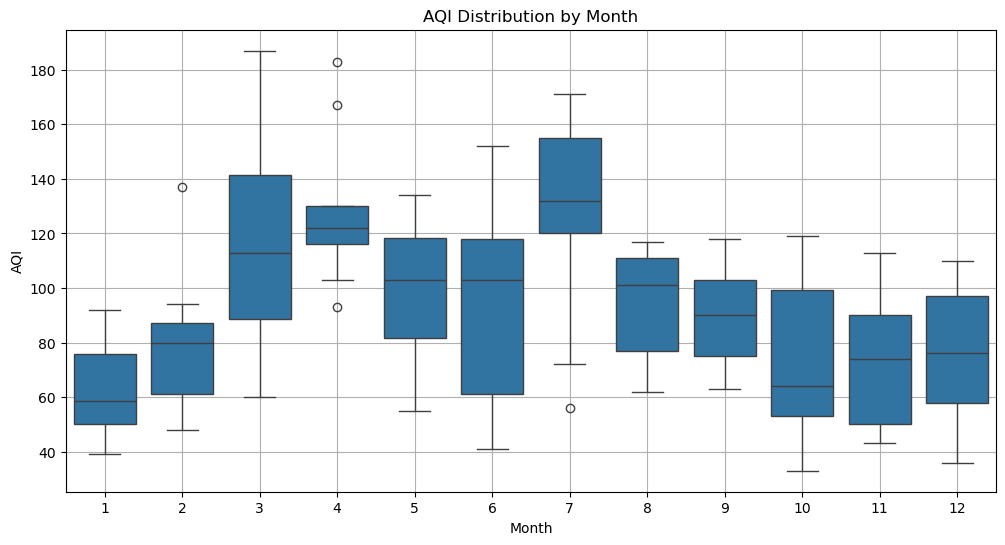

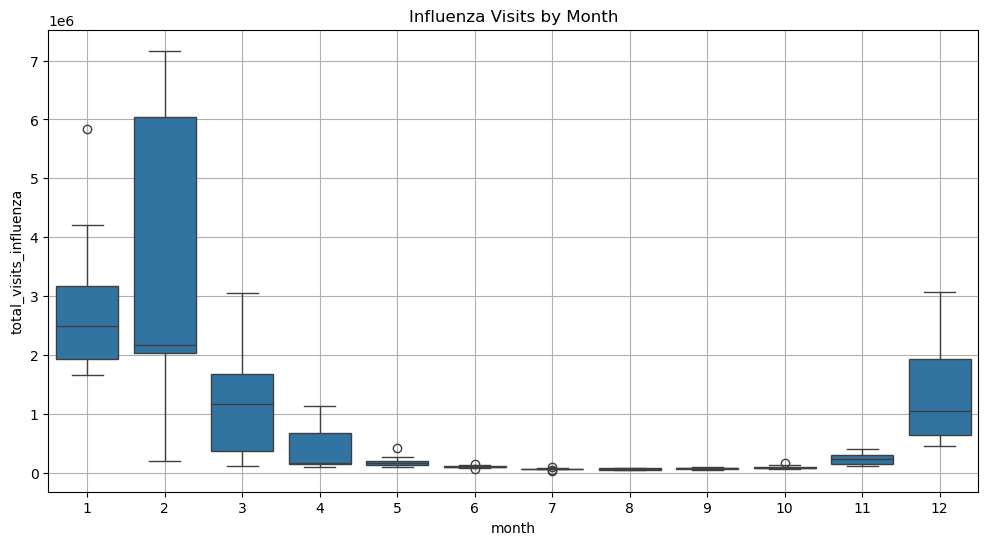

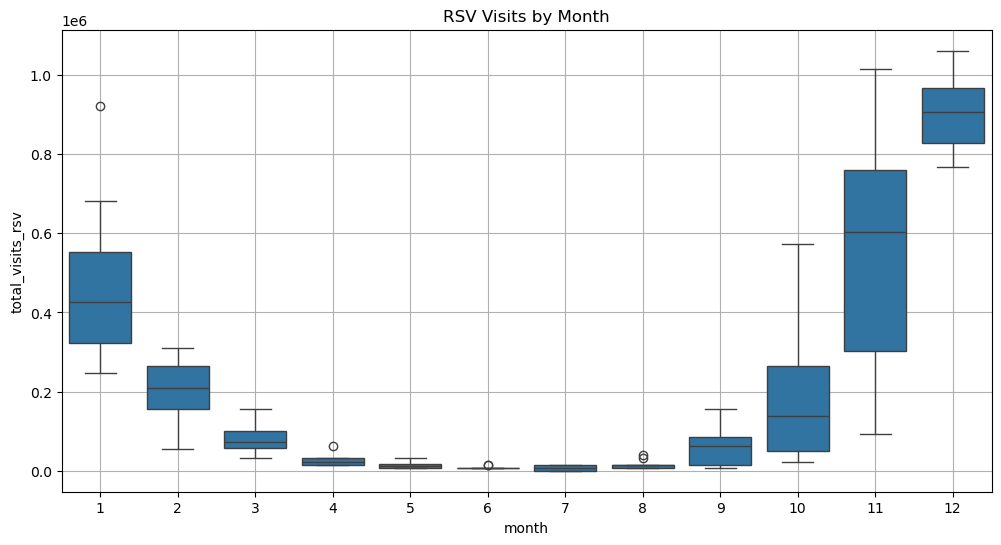

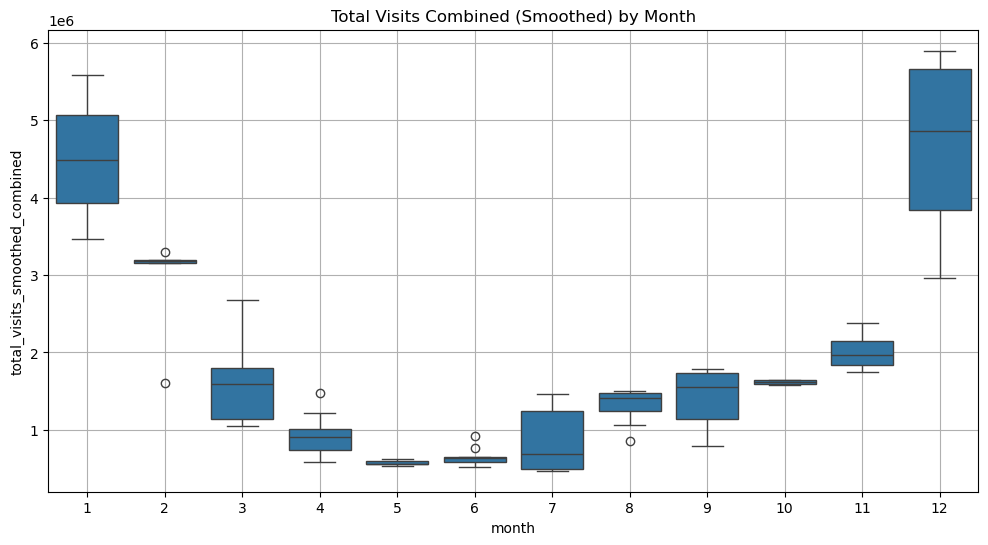

In [18]:
boston_pd["month"] = boston_pd["date"].dt.month
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="month", y="avg_us_aqi")
plt.title("AQI Distribution by Month")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="month", y="total_visits_influenza")
plt.title("Influenza Visits by Month")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="month", y="total_visits_rsv")
plt.title("RSV Visits by Month")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_pd, x="month", y="total_visits_smoothed_combined")
plt.title("Total Visits Combined (Smoothed) by Month")
plt.grid()
plt.show()


In [19]:
# Remove monthly averages from AQI and hospitalizations
boston_pd["month"] = boston_pd["date"].dt.month

# Deseasonalize each variable
boston_pd["aqi_deseason"] = boston_pd["avg_us_aqi"] - boston_pd.groupby("month")["avg_us_aqi"].transform("mean")
boston_pd["flu_deseason"] = boston_pd["total_visits_influenza"] - boston_pd.groupby("month")["total_visits_influenza"].transform("mean")
boston_pd["rsv_deseason"] = boston_pd["total_visits_rsv"] - boston_pd.groupby("month")["total_visits_rsv"].transform("mean")

corr_deseason = {
    "Influenza Corr": boston_pd["aqi_deseason"].corr(boston_pd["flu_deseason"]),
    "RSV Corr": boston_pd["aqi_deseason"].corr(boston_pd["rsv_deseason"])
}
print(corr_deseason)


StatementMeta(sparkpool, 14, 20, Finished, Available, Finished)

{'Influenza Corr': -0.002506965077972738, 'RSV Corr': 0.15179558684106603}


StatementMeta(sparkpool, 14, 50, Finished, Available, Finished)

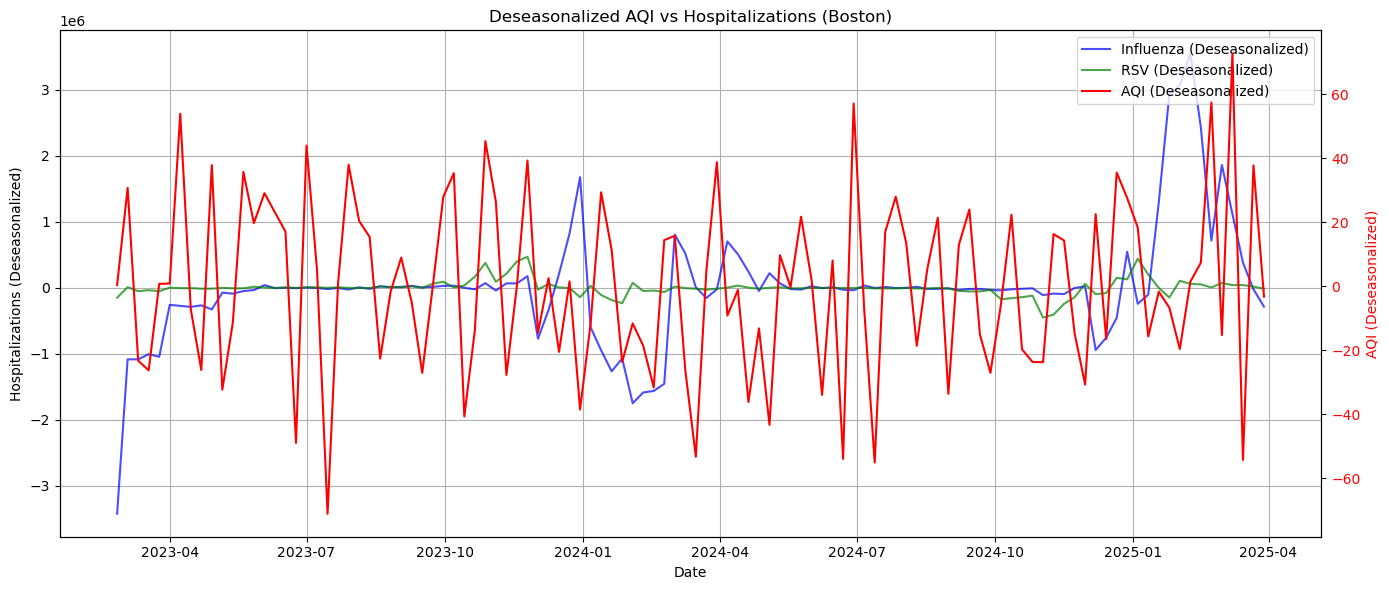

In [49]:
import matplotlib.pyplot as plt

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot flu and RSV on the primary y-axis
ax1.plot(boston_pd["date"], boston_pd["flu_deseason"], label="Influenza (Deseasonalized)", color="blue", alpha=0.7)
ax1.plot(boston_pd["date"], boston_pd["rsv_deseason"], label="RSV (Deseasonalized)", color="green", alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Hospitalizations (Deseasonalized)", color="black")
ax1.tick_params(axis='y')
ax1.grid(True)  

# Create a secondary y-axis for AQI
ax2 = ax1.twinx()
ax2.plot(boston_pd["date"], boston_pd["aqi_deseason"], label="AQI (Deseasonalized)", color="red")
ax2.set_ylabel("AQI (Deseasonalized)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Title and layout
plt.title("Deseasonalized AQI vs Hospitalizations (Boston)")
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.show()



In [ ]:
pollutants = ["avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_so2", "avg_co", "avg_us_aqi"]
for pollutant in pollutants:
    for lag in [4, 5]:
        boston_pd[f"{pollutant}_lag{lag}"] = boston_pd[pollutant].shift(lag)
        
for pollutant in pollutants:
    for lag in [4, 5]:
        col = f"{pollutant}_lag{lag}"
        boston_pd[f"{col}_deseason"] = boston_pd[col] - boston_pd.groupby("month")[col].transform("mean")

In [25]:

        # List of pollutants with lags
pollutant_lags1 = [
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3"
]

pollutant_lags = [
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3", "avg_pm2_5_lag4", "avg_pm2_5_lag5",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3", "avg_pm10_lag4", "avg_pm10_lag5",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3", "avg_no2_lag4", "avg_no2_lag5",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3", "avg_o3_lag4", "avg_o3_lag5",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3", "avg_so2_lag4", "avg_so2_lag5",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3", "avg_co_lag4", "avg_co_lag5",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3", "avg_us_aqi_lag4", "avg_us_aqi_lag5"
]

boston_pd["month"] = boston_pd["date"].dt.month
boston_pd["flu_deseason"] = boston_pd["total_visits_influenza"] - boston_pd.groupby("month")["total_visits_influenza"].transform("mean")
boston_pd["rsv_deseason"] = boston_pd["total_visits_rsv"] - boston_pd.groupby("month")["total_visits_rsv"].transform("mean")

for col in pollutant_lags:
    boston_pd[f"{col}_deseason"] = boston_pd[col] - boston_pd.groupby("month")[col].transform("mean")
results = []

for col in pollutant_lags:
    deseasoned_col = f"{col}_deseason"
    flu_corr = boston_pd[deseasoned_col].corr(boston_pd["flu_deseason"])
    rsv_corr = boston_pd[deseasoned_col].corr(boston_pd["rsv_deseason"])
    results.append({
        "Variable": col,
        "Flu Corr": flu_corr,
        "RSV Corr": rsv_corr
    })

correlation_lagged_deseason_df = pd.DataFrame(results)
correlation_lagged_deseason_df = correlation_lagged_deseason_df.sort_values("Flu Corr", ascending=False)
print(correlation_lagged_deseason_df.head(10))



StatementMeta(sparkpool, 14, 26, Finished, Available, Finished)

          Variable  Flu Corr  RSV Corr
12    avg_no2_lag3  0.288730 -0.144647
22    avg_so2_lag3  0.272317 -0.007459
27     avg_co_lag3  0.262198 -0.137117
25     avg_co_lag1  0.257730  0.009671
7    avg_pm10_lag3  0.237994  0.016873
26     avg_co_lag2  0.223119 -0.052748
10    avg_no2_lag1  0.219388  0.019762
2   avg_pm2_5_lag3  0.215776 -0.005561
11    avg_no2_lag2  0.214577 -0.052609
21    avg_so2_lag2  0.208563  0.039356


StatementMeta(sparkpool, 14, 27, Finished, Available, Finished)

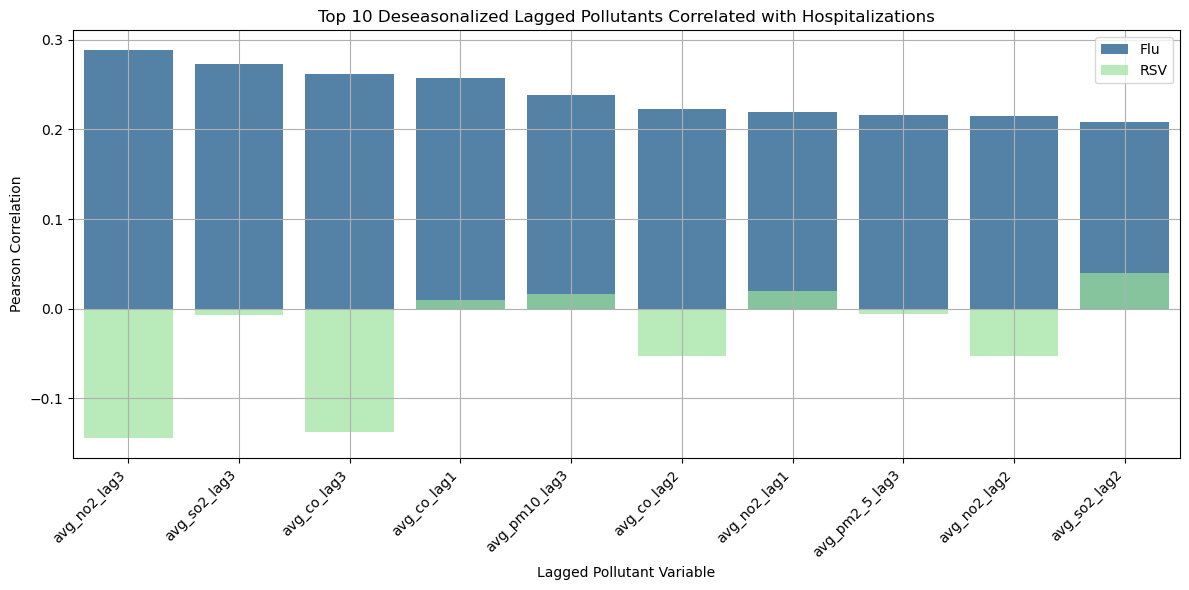

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by Flu correlation (or RSV if preferred)
top_vars = correlation_lagged_deseason_df.sort_values("Flu Corr", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vars, x="Variable", y="Flu Corr", color="steelblue", label="Flu")
sns.barplot(data=top_vars, x="Variable", y="RSV Corr", color="lightgreen", label="RSV", alpha=0.7)

plt.title("Top 10 Deseasonalized Lagged Pollutants Correlated with Hospitalizations")
plt.ylabel("Pearson Correlation")
plt.xlabel("Lagged Pollutant Variable")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


StatementMeta(sparkpool, 14, 28, Finished, Available, Finished)

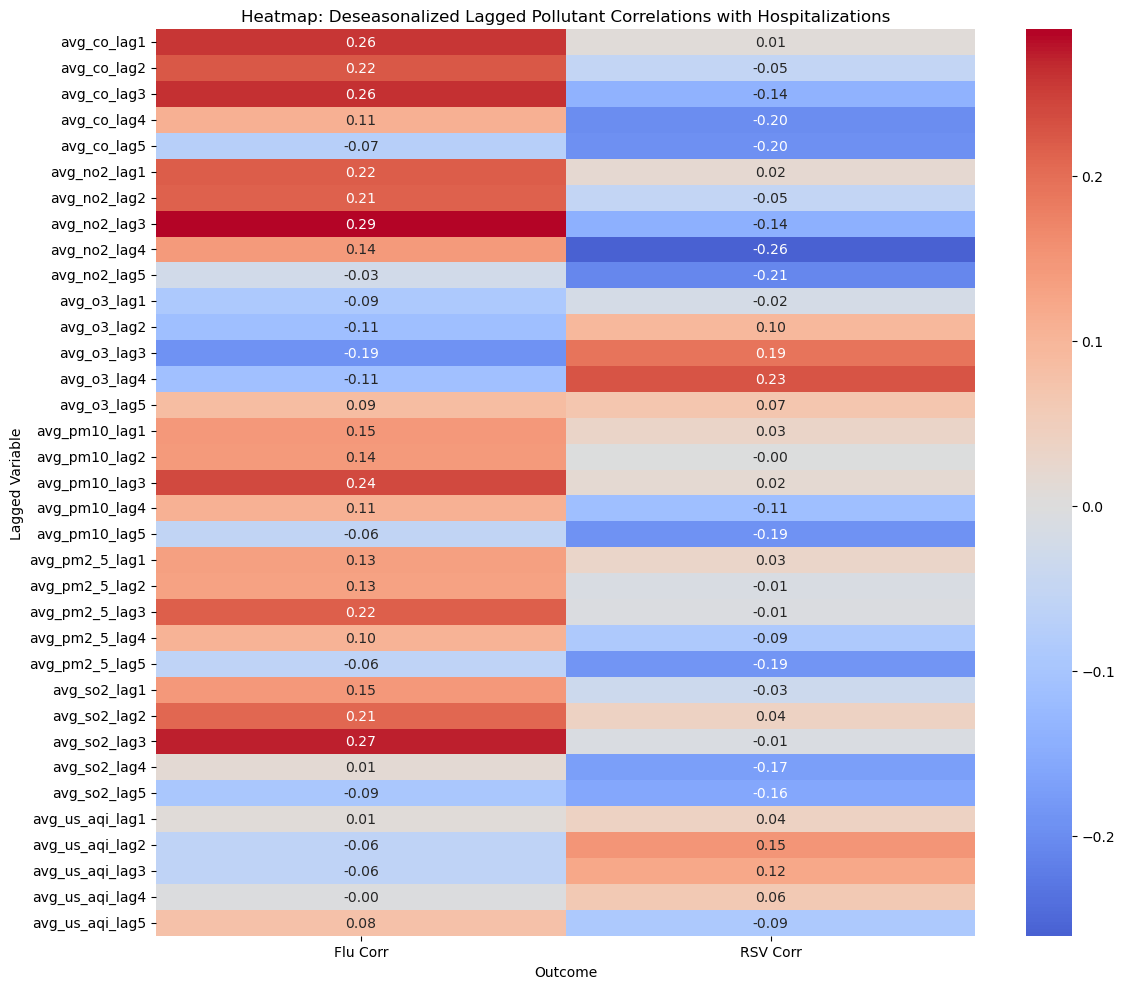

In [27]:
# Melt into long format
corr_melt = correlation_lagged_deseason_df.melt(id_vars="Variable", var_name="Outcome", value_name="Correlation")

# Pivot for heatmap
corr_pivot = corr_melt.pivot(index="Variable", columns="Outcome", values="Correlation")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pivot, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap: Deseasonalized Lagged Pollutant Correlations with Hospitalizations")
plt.ylabel("Lagged Variable")
plt.tight_layout()
plt.show()


### Deseasonalized Lagged Pollutants and Influenza Hospitalizations

After deseasonalizing the dataset to remove monthly trends, we calculated Pearson correlations between **lagged air pollutant variables** (1–5 weeks prior) and **weekly influenza and RSV hospitalizations**. The goal was to identify which pollutants, when elevated in previous weeks, are most associated with increased hospital burden.


####  Interpretation

-  **NO₂ (3-week lag)** has the highest correlation with flu hospitalizations, suggesting pollution exposure **3 weeks prior** may be a significant predictor.
- CO, SO₂, and PM₁₀ (especially at lag 3) also show consistent positive correlations.
- **RSV correlations** are generally weaker and more mixed, possibly due to different seasonal and viral dynamics.

This supports the hypothesis that **air pollution contributes to respiratory health burdens with a multi-week delay**, and highlights the importance of considering lagged exposures in predictive modeling.


In [28]:
houston_df.printSchema()

StatementMeta(sparkpool, 14, 29, Finished, Available, Finished)

root
 |-- week_end: timestamp (nullable = true)
 |-- ed_trends_influenza: string (nullable = true)
 |-- ed_trends_rsv: string (nullable = true)
 |-- total_visits_influenza: integer (nullable = true)
 |-- total_visits_rsv: integer (nullable = true)
 |-- total_visits_smoothed_combined: double (nullable = true)
 |-- total_visits_smoothed_influenza: double (nullable = true)
 |-- total_visits_smoothed_rsv: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- high_visits_influenza: integer (nullable = true)
 |-- high_visits_rsv: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- avg_co: double (nullable = true)
 |-- avg_no2: double (nullable = true)
 |-- avg_o3: double (nullable = true)
 |-- avg_so2: double (nullable = true)
 |-- avg_pm2_5: double (nullable = true)
 |-- avg_pm10: double (nullable = true)
 |-- avg_us_aqi: double (nullable = true)
 |-- high_pollution_events: long (nullable = true)
 |-- avg_pm2_5_lag1: double (nullable = true)
 |-- avg_pm2_5_

In [29]:
# Step 1: List all variables you want to include
all_columns = [
    "date", "week_end", "Location",
    
    # Hospitalization totals
    "total_visits_influenza", "total_visits_rsv",
    "total_visits_smoothed_combined", "total_visits_smoothed_influenza", "total_visits_smoothed_rsv",
    "high_visits_influenza", "high_visits_rsv",

    # Pollutant averages
    "avg_co", "avg_no2", "avg_o3", "avg_so2",
    "avg_pm2_5", "avg_pm10", "avg_us_aqi",
    "high_pollution_events",

    # AQI and pollutants - lagged (1 to 3 weeks)
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3",

    # Optional: hospitalization_effective_date (if relevant)
    "hospitalization_effective_date"
]

# Step 2: Select and convert to Pandas
houston_pd = houston_df.select(all_columns).toPandas()

# Step 3: Clean up
houston_pd["date"] = pd.to_datetime(houston_pd["date"])
houston_pd = houston_pd.sort_values("date").reset_index(drop=True)

StatementMeta(sparkpool, 14, 30, Finished, Available, Finished)

StatementMeta(sparkpool, 14, 31, Finished, Available, Finished)

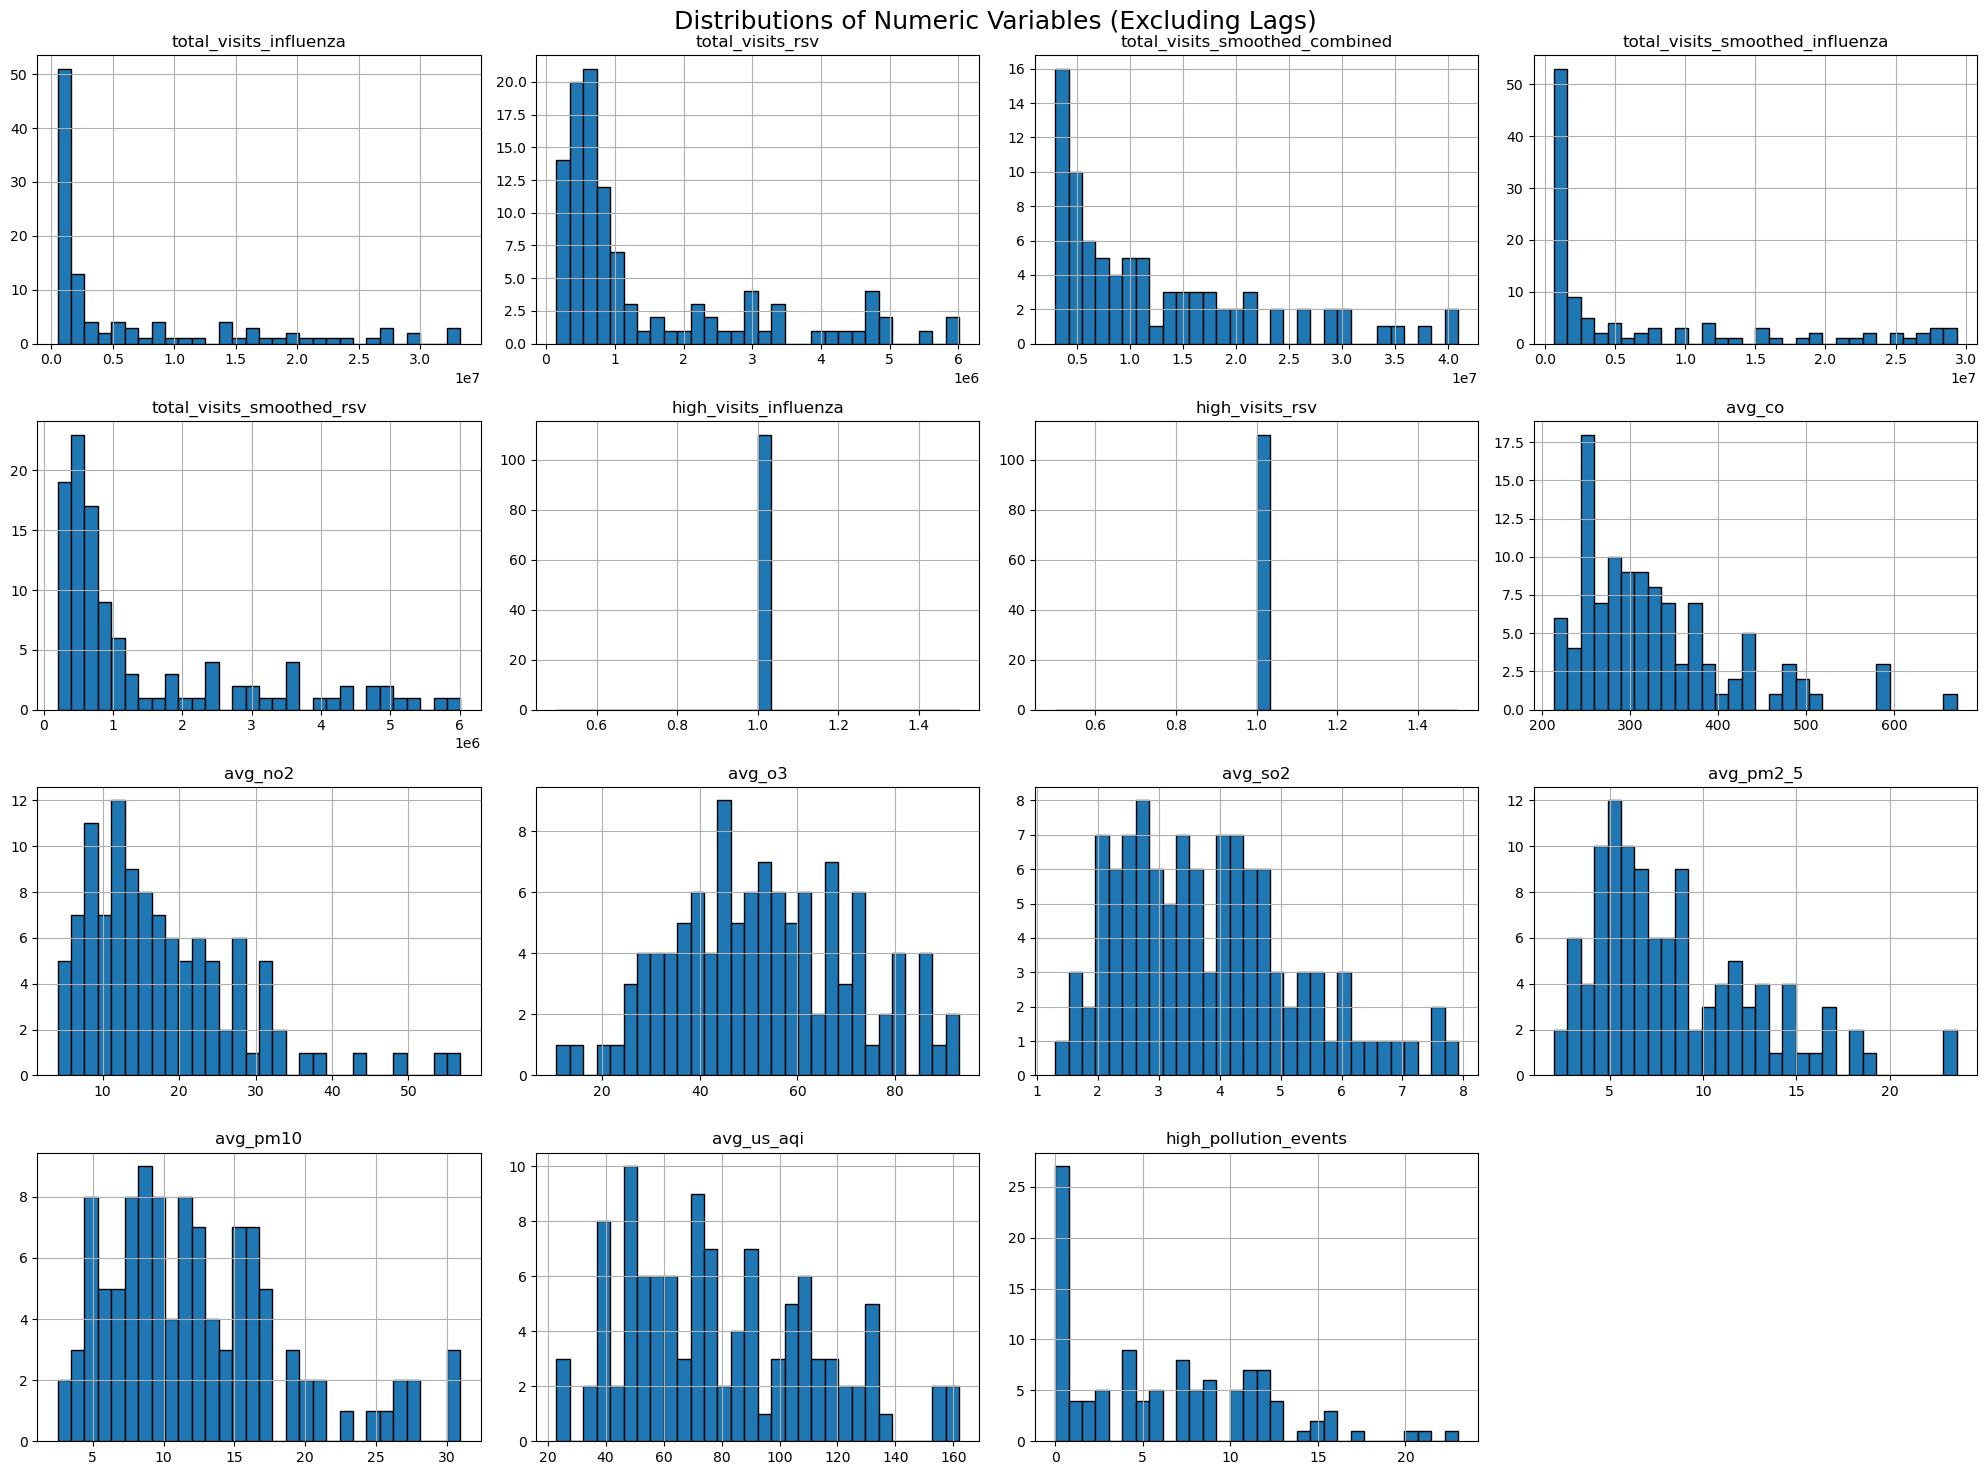

In [30]:

numeric_columns = houston_pd.select_dtypes(include=["float64", "int64"]).columns.tolist()

filtered_columns = [
    "total_visits_influenza",
"total_visits_rsv",
"total_visits_smoothed_combined",
"total_visits_smoothed_influenza",
"total_visits_smoothed_rsv",
"high_visits_influenza",
"high_visits_rsv",
"avg_co",
"avg_no2",
"avg_o3",
"avg_so2",
"avg_pm2_5",
"avg_pm10",
"avg_us_aqi",
"high_pollution_events"
]


houston_pd[filtered_columns].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distributions of Numeric Variables (Excluding Lags) in Houston Dataset", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


StatementMeta(sparkpool, 14, 32, Finished, Available, Finished)

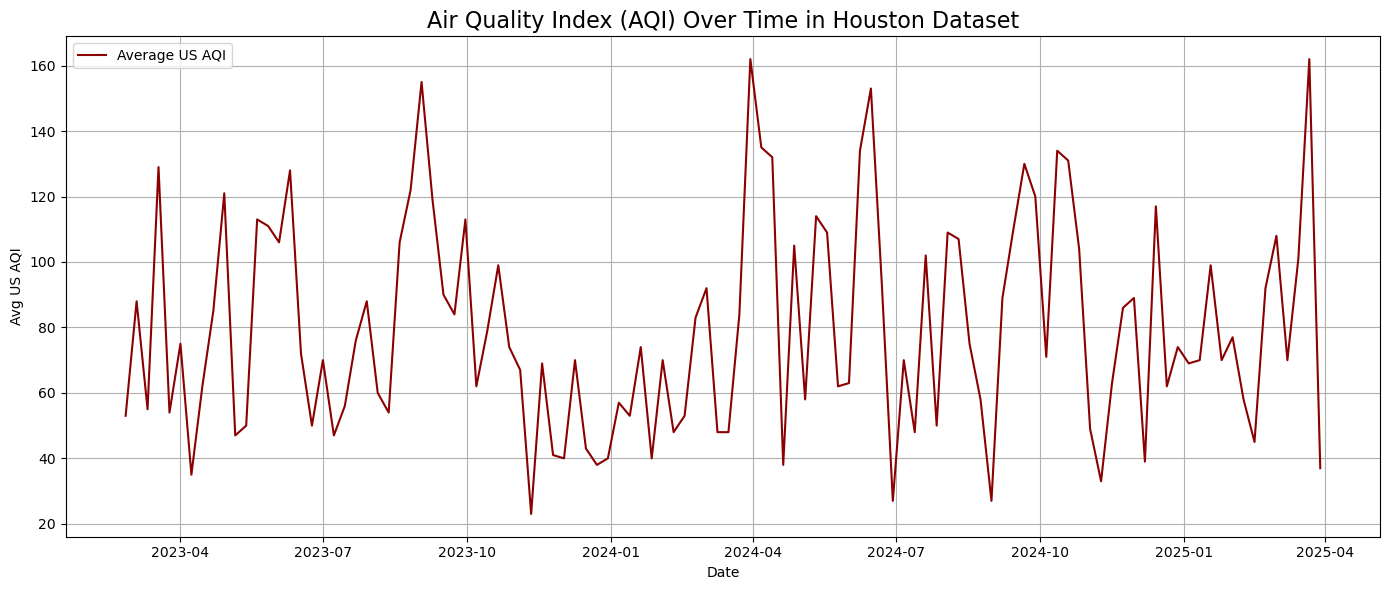

In [31]:
# Make sure 'date' is a datetime and data is sorted
houston_pd["date"] = pd.to_datetime(houston_pd["date"])
houston_pd = houston_pd.sort_values("date")

houston_pd["avg_us_aqi"] = houston_pd["avg_us_aqi"].replace(0, np.nan)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(houston_pd["date"], houston_pd["avg_us_aqi"], color="darkred", label="Average US AQI")
plt.title("Air Quality Index (AQI) Over Time in Houston Dataset", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Avg US AQI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


StatementMeta(sparkpool, 14, 33, Finished, Available, Finished)

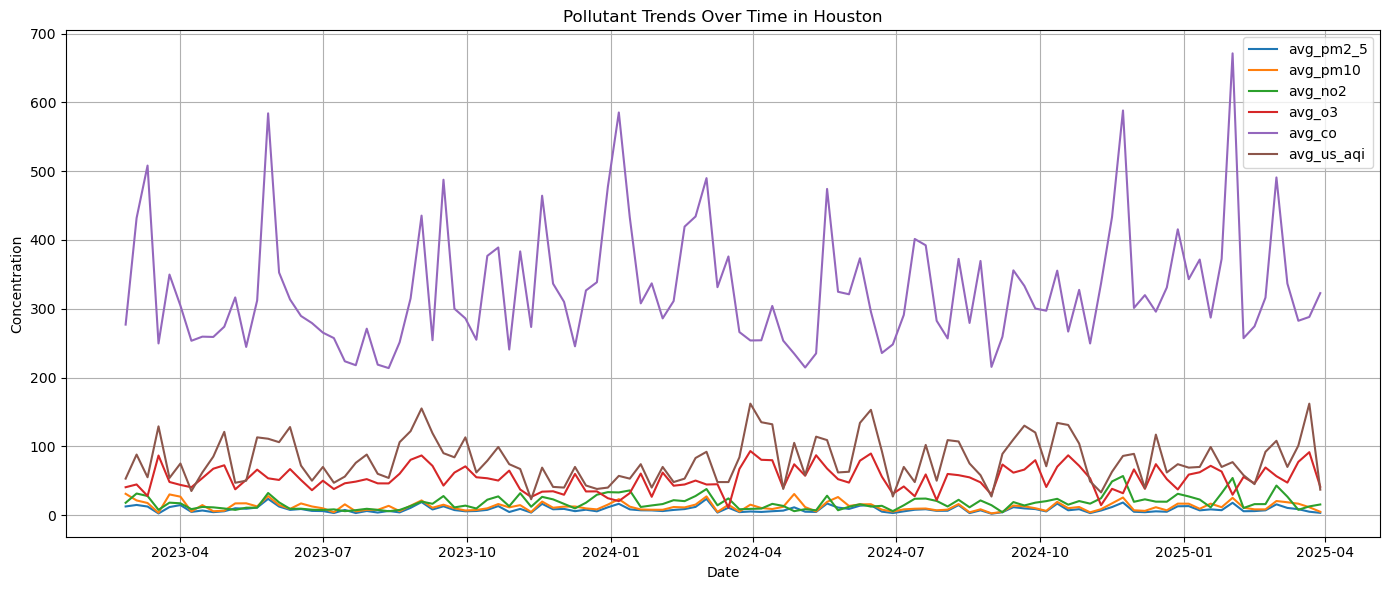

In [32]:

plt.figure(figsize=(14, 6))
for col in ["avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_co", "avg_us_aqi"]:
    plt.plot(houston_pd["date"], houston_pd[col], label=col)

plt.title("Pollutant Trends Over Time in Houston")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

StatementMeta(sparkpool, 14, 36, Finished, Available, Finished)

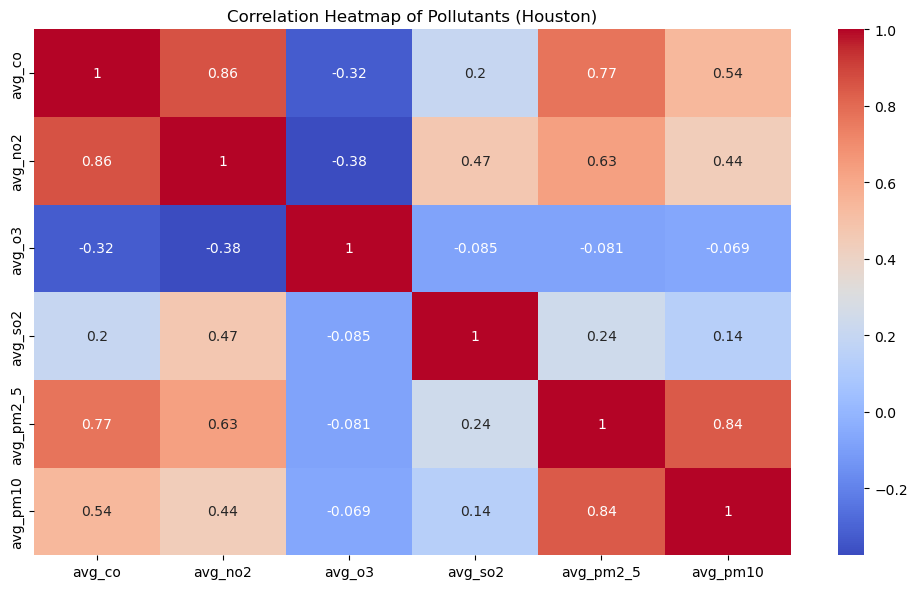

In [35]:

# Select only pollutant columns
pollutant_only = houston_pd[[
    "avg_co", "avg_no2", "avg_o3", "avg_so2",
    "avg_pm2_5", "avg_pm10"
]]

plt.figure(figsize=(10, 6))
sns.heatmap(pollutant_only.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants (Houston)")
plt.tight_layout()
plt.show()

StatementMeta(sparkpool, 14, 37, Finished, Available, Finished)

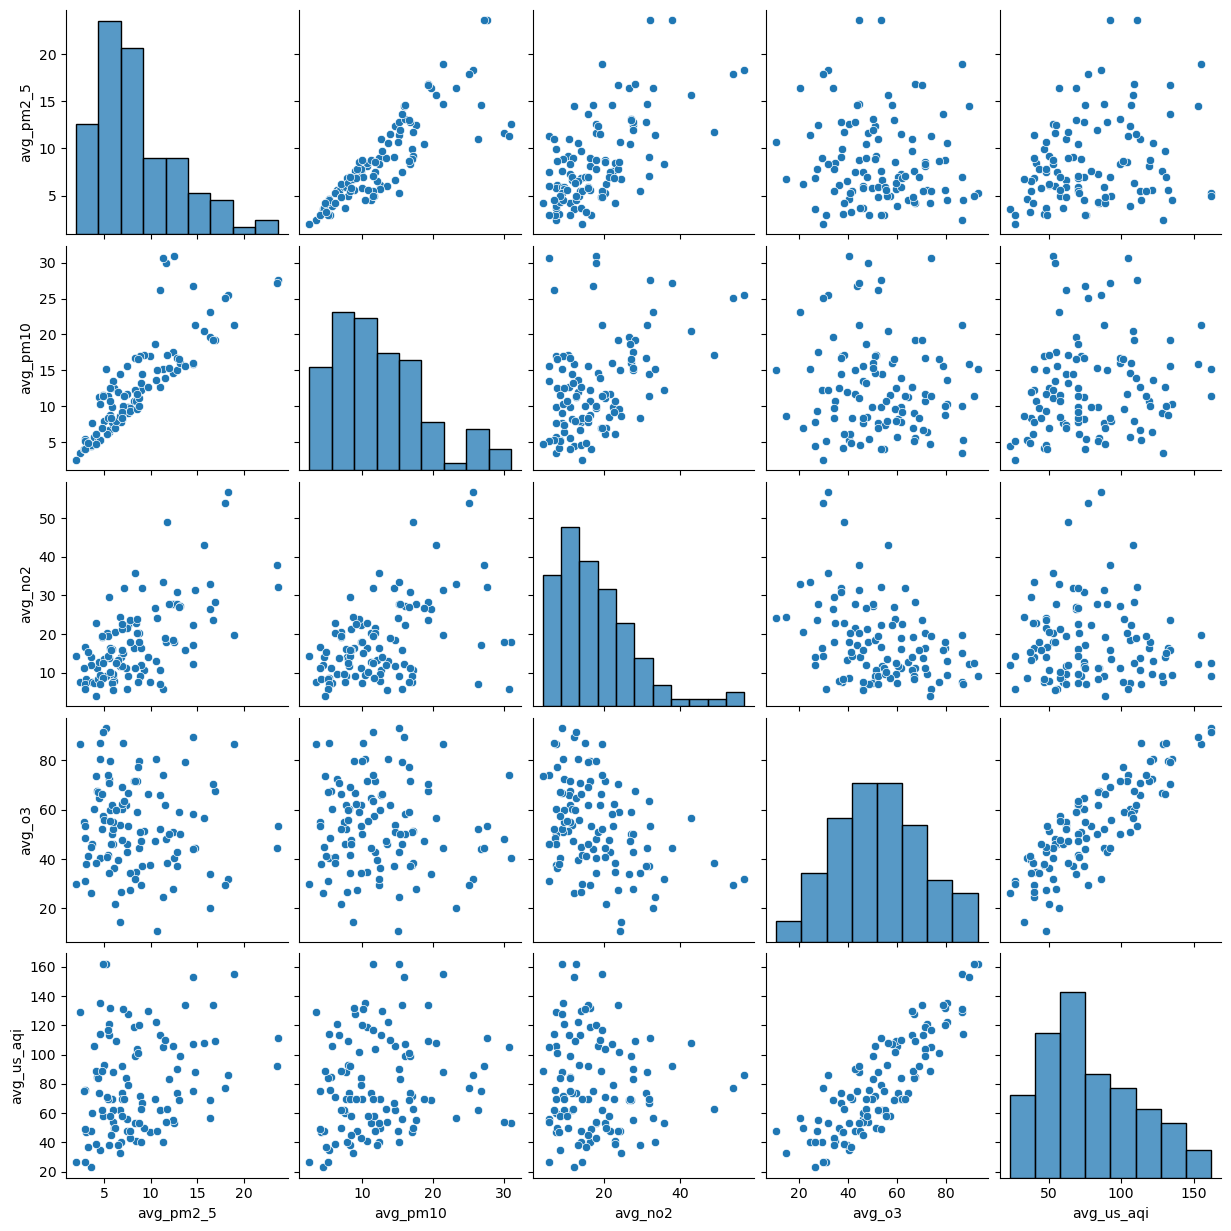

In [36]:
sns.pairplot(houston_pd[[
    "avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_us_aqi"
]])

StatementMeta(sparkpool, 14, 38, Finished, Available, Finished)

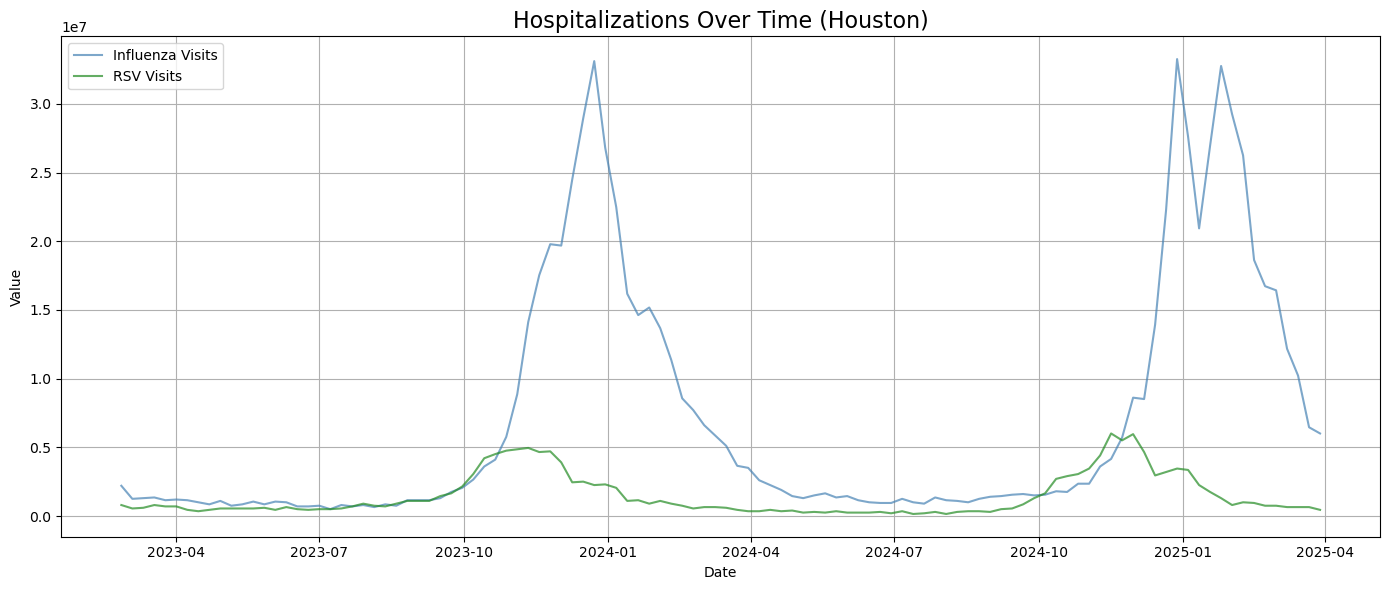

In [37]:

houston_pd["date"] = pd.to_datetime(houston_pd["date"])
houston_pd = houston_pd.sort_values("date")

# Plot
plt.figure(figsize=(14, 6))

plt.plot(houston_pd["date"], houston_pd["total_visits_influenza"], label="Influenza Visits", color="steelblue", alpha=0.7)
plt.plot(houston_pd["date"], houston_pd["total_visits_rsv"], label="RSV Visits", color="forestgreen", alpha=0.7)

plt.title("Hospitalizations Over Time (Houston)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


StatementMeta(sparkpool, 14, 41, Finished, Available, Finished)

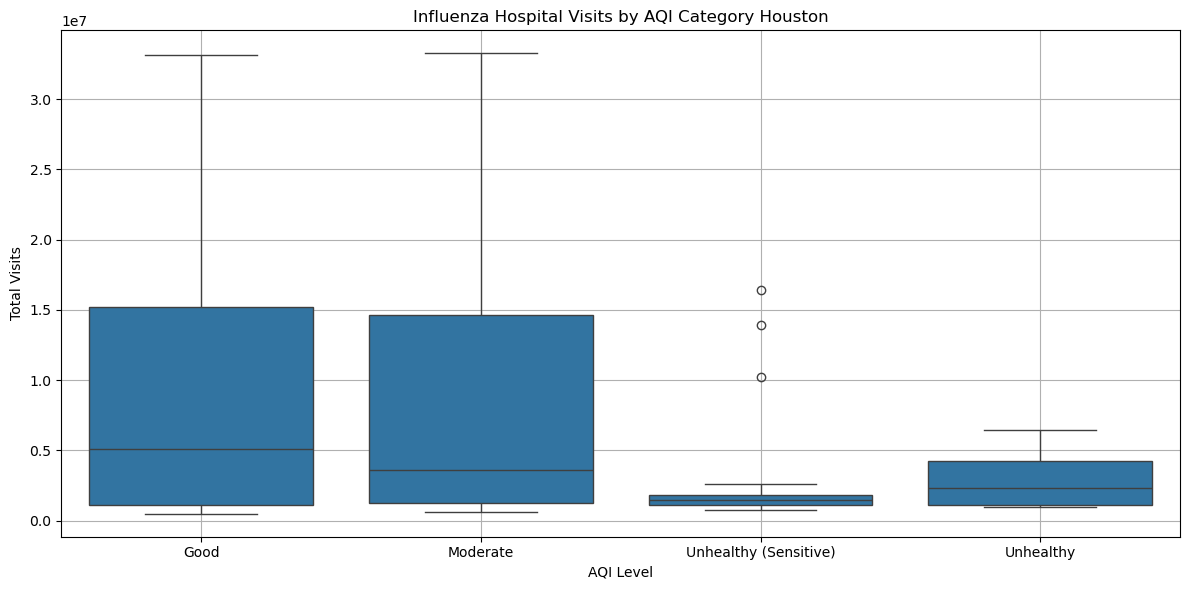

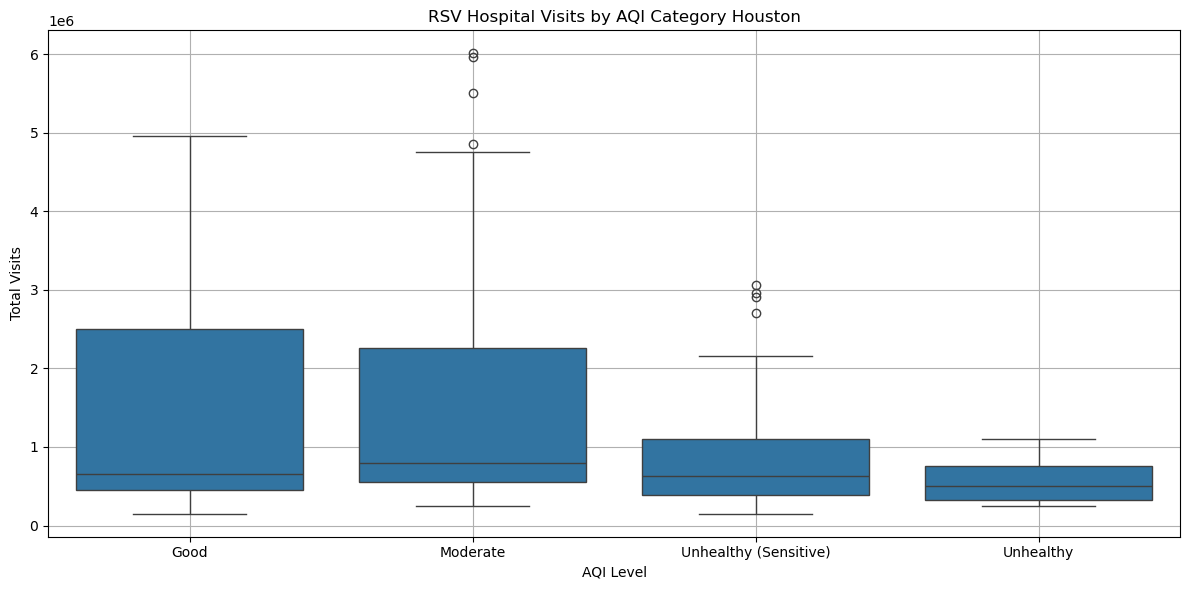

In [40]:
def categorize_aqi(aqi):
    if pd.isna(aqi): return "Missing"
    elif aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy (Sensitive)"
    else: return "Unhealthy"

houston_pd["AQI_Level"] = houston_pd["avg_us_aqi"].apply(categorize_aqi)

plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="AQI_Level", y="total_visits_influenza", order=["Good", "Moderate", "Unhealthy (Sensitive)", "Unhealthy"])
plt.title("Influenza Hospital Visits by AQI Category Houston")
plt.ylabel("Total Visits")
plt.xlabel("AQI Level")
plt.grid(True)
plt.tight_layout()
plt.show()

# Repeat for RSV
plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="AQI_Level", y="total_visits_rsv", order=["Good", "Moderate", "Unhealthy (Sensitive)", "Unhealthy"])
plt.title("RSV Hospital Visits by AQI Category Houston")
plt.ylabel("Total Visits")
plt.xlabel("AQI Level")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
lag_variables_houston = [
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3"
]
# Include the target variables too
columns_to_fetch_houston = lag_variables_houston + ["total_visits_influenza", "total_visits_rsv"]

# Convert to Pandas
lags_pd_houston = houston_df.select(columns_to_fetch_houston).toPandas()

# Calculate correlations between weekly lags and current hospitalizations
correlation_data = {
    "Lag (Weeks)": [1, 2, 3],
    "Influenza Corr": [
        lags_pd_houston["avg_us_aqi_lag1"].corr(lags_pd_houston["total_visits_influenza"]),
        lags_pd_houston["avg_us_aqi_lag2"].corr(lags_pd_houston["total_visits_influenza"]),
        lags_pd_houston["avg_us_aqi_lag3"].corr(lags_pd_houston["total_visits_influenza"])
    ],
    "RSV Corr": [
        lags_pd_houston["avg_us_aqi_lag1"].corr(lags_pd_houston["total_visits_rsv"]),
        lags_pd_houston["avg_us_aqi_lag2"].corr(lags_pd_houston["total_visits_rsv"]),
        lags_pd_houston["avg_us_aqi_lag3"].corr(lags_pd_houston["total_visits_rsv"])
    ]
}

correlation_df_houston = pd.DataFrame(correlation_data)
print(correlation_df_houston)

StatementMeta(sparkpool, 14, 44, Finished, Available, Finished)

   Lag (Weeks)  Influenza Corr  RSV Corr
0            1       -0.269973 -0.141620
1            2       -0.263836 -0.077743
2            3       -0.264497 -0.003874


StatementMeta(sparkpool, 14, 45, Finished, Available, Finished)

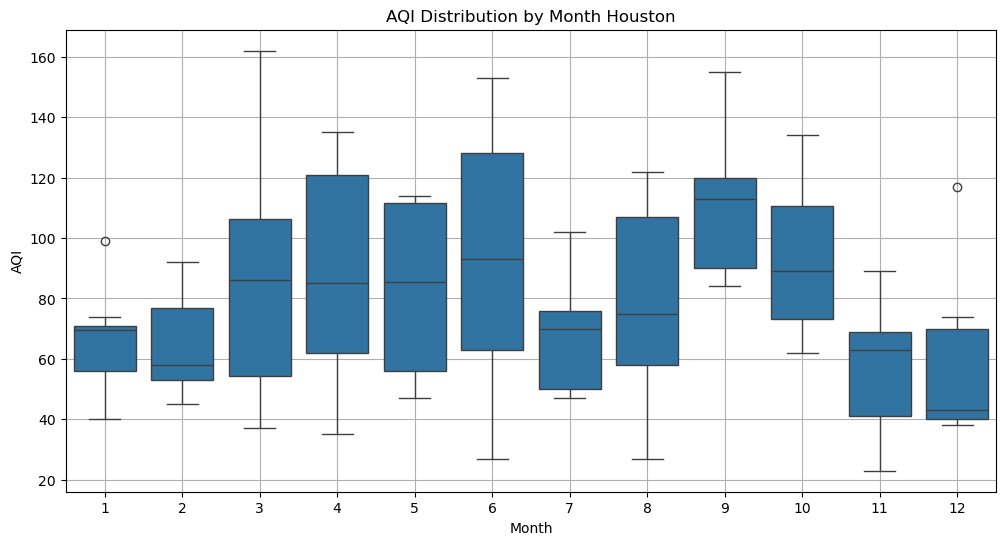

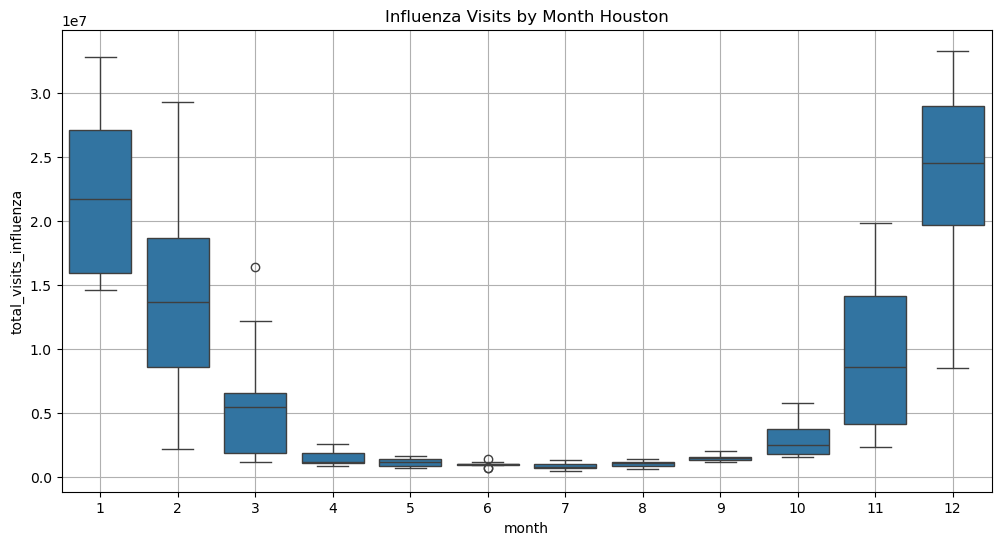

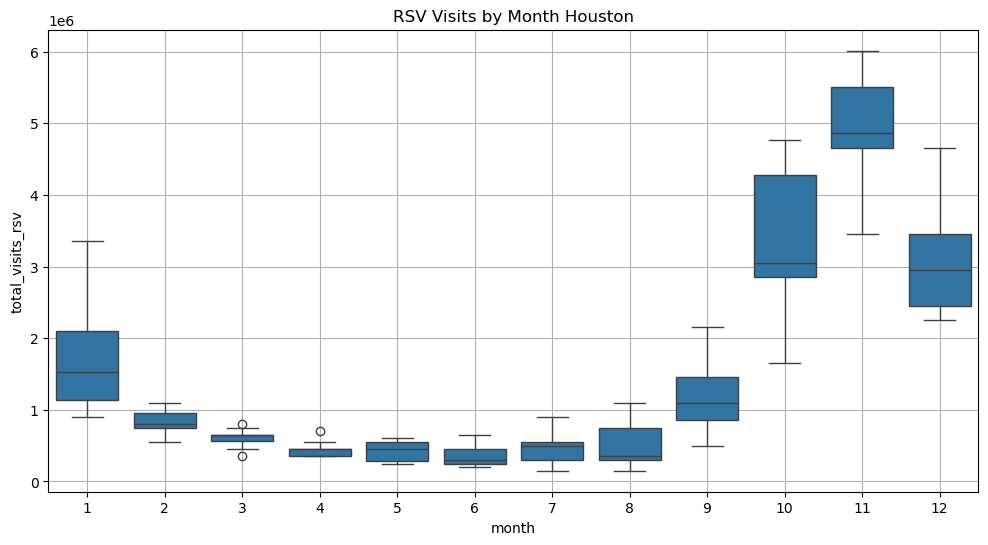

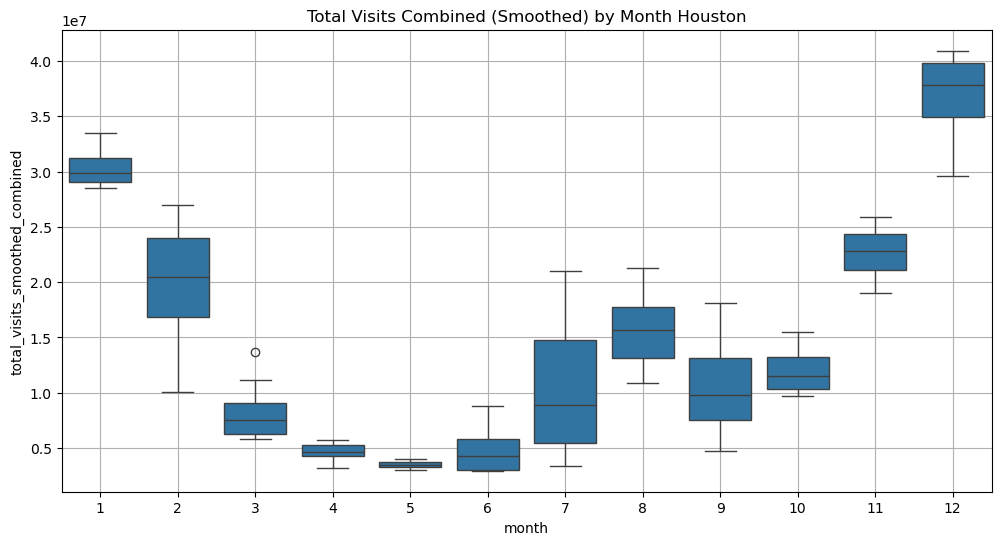

In [44]:
houston_pd["month"] = houston_pd["date"].dt.month
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="month", y="avg_us_aqi")
plt.title("AQI Distribution by Month Houston")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="month", y="total_visits_influenza")
plt.title("Influenza Visits by Month Houston")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="month", y="total_visits_rsv")
plt.title("RSV Visits by Month Houston")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=houston_pd, x="month", y="total_visits_smoothed_combined")
plt.title("Total Visits Combined (Smoothed) by Month Houston")
plt.grid()
plt.show()


In [45]:
# Remove monthly averages from AQI and hospitalizations
houston_pd["month"] = houston_pd["date"].dt.month

# Deseasonalize each variable
houston_pd["aqi_deseason"] = houston_pd["avg_us_aqi"] - houston_pd.groupby("month")["avg_us_aqi"].transform("mean")
houston_pd["flu_deseason"] = houston_pd["total_visits_influenza"] - houston_pd.groupby("month")["total_visits_influenza"].transform("mean")
houston_pd["rsv_deseason"] = houston_pd["total_visits_rsv"] - houston_pd.groupby("month")["total_visits_rsv"].transform("mean")

corr_deseason2 = {
    "Influenza Corr": houston_pd["aqi_deseason"].corr(houston_pd["flu_deseason"]),
    "RSV Corr": houston_pd["aqi_deseason"].corr(houston_pd["rsv_deseason"])
}
print(corr_deseason2)


StatementMeta(sparkpool, 14, 46, Finished, Available, Finished)

{'Influenza Corr': 0.015953821745466196, 'RSV Corr': 0.0519966462211838}


StatementMeta(sparkpool, 14, 63, Finished, Available, Finished)

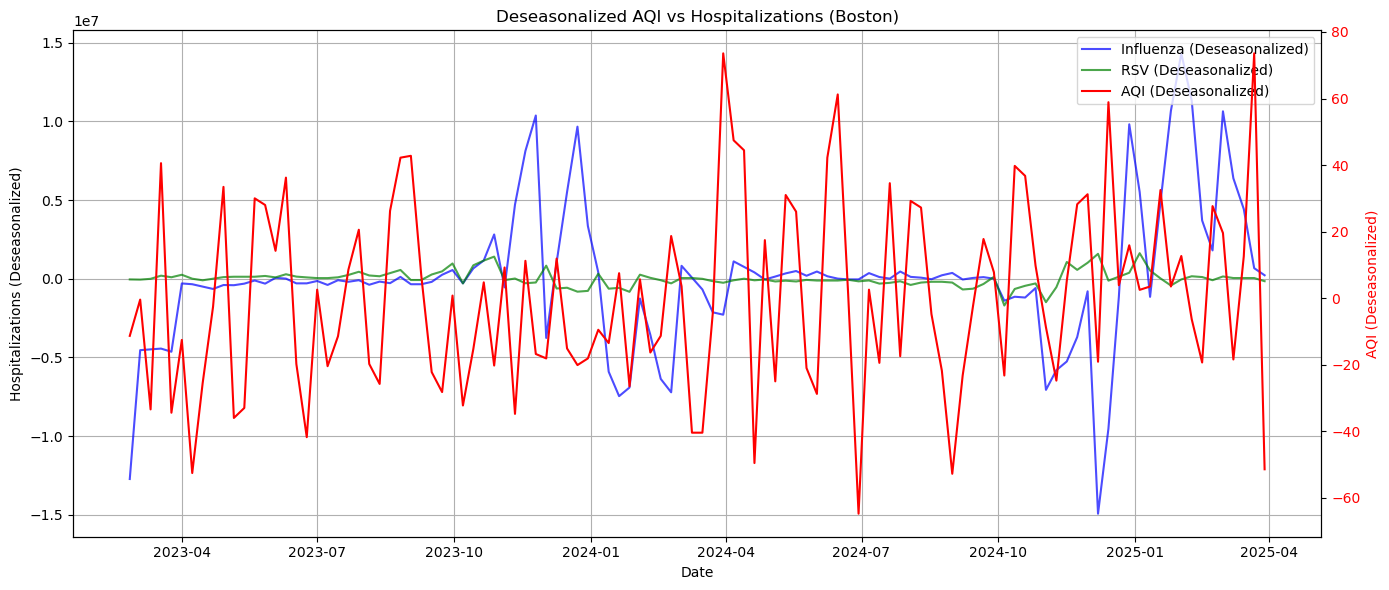

In [62]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot flu and RSV on the primary y-axis
ax1.plot(houston_pd["date"], houston_pd["flu_deseason"], label="Influenza (Deseasonalized)", color="blue", alpha=0.7)
ax1.plot(houston_pd["date"], houston_pd["rsv_deseason"], label="RSV (Deseasonalized)", color="green", alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Hospitalizations (Deseasonalized)", color="black")
ax1.tick_params(axis='y')
ax1.grid(True)  

# Create a secondary y-axis for AQI
ax2 = ax1.twinx()
ax2.plot(houston_pd["date"], houston_pd["aqi_deseason"], label="AQI (Deseasonalized)", color="red")
ax2.set_ylabel("AQI (Deseasonalized)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Title and layout
plt.title("Deseasonalized AQI vs Hospitalizations (Boston)")
fig.tight_layout()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.show()


In [51]:
pollutants = ["avg_pm2_5", "avg_pm10", "avg_no2", "avg_o3", "avg_so2", "avg_co", "avg_us_aqi"]
for pollutant in pollutants:
    for lag in [4, 5]:
        houston_pd[f"{pollutant}_lag{lag}"] = houston_pd[pollutant].shift(lag)
        
for pollutant in pollutants:
    for lag in [4, 5]:
        col = f"{pollutant}_lag{lag}"
        houston_pd[f"{col}_deseason"] = houston_pd[col] - houston_pd.groupby("month")[col].transform("mean")
        
        # List of pollutants with lags

pollutant_lags = [
    "avg_pm2_5_lag1", "avg_pm2_5_lag2", "avg_pm2_5_lag3", "avg_pm2_5_lag4", "avg_pm2_5_lag5",
    "avg_pm10_lag1", "avg_pm10_lag2", "avg_pm10_lag3", "avg_pm10_lag4", "avg_pm10_lag5",
    "avg_no2_lag1", "avg_no2_lag2", "avg_no2_lag3", "avg_no2_lag4", "avg_no2_lag5",
    "avg_o3_lag1", "avg_o3_lag2", "avg_o3_lag3", "avg_o3_lag4", "avg_o3_lag5",
    "avg_so2_lag1", "avg_so2_lag2", "avg_so2_lag3", "avg_so2_lag4", "avg_so2_lag5",
    "avg_co_lag1", "avg_co_lag2", "avg_co_lag3", "avg_co_lag4", "avg_co_lag5",
    "avg_us_aqi_lag1", "avg_us_aqi_lag2", "avg_us_aqi_lag3", "avg_us_aqi_lag4", "avg_us_aqi_lag5"
]

houston_pd["month"] = houston_pd["date"].dt.month
houston_pd["flu_deseason"] = houston_pd["total_visits_influenza"] - houston_pd.groupby("month")["total_visits_influenza"].transform("mean")
houston_pd["rsv_deseason"] = houston_pd["total_visits_rsv"] - houston_pd.groupby("month")["total_visits_rsv"].transform("mean")

for col in pollutant_lags:
    houston_pd[f"{col}_deseason"] = houston_pd[col] - houston_pd.groupby("month")[col].transform("mean")
results = []

for col in pollutant_lags:
    deseasoned_col = f"{col}_deseason"
    flu_corr = houston_pd[deseasoned_col].corr(houston_pd["flu_deseason"])
    rsv_corr = houston_pd[deseasoned_col].corr(houston_pd["rsv_deseason"])
    results.append({
        "Variable": col,
        "Flu Corr": flu_corr,
        "RSV Corr": rsv_corr
    })

correlation_lagged_deseason_df_houston = pd.DataFrame(results)
correlation_lagged_deseason_df_houston = correlation_lagged_deseason_df_houston.sort_values("Flu Corr", ascending=False)
print(correlation_lagged_deseason_df_houston.head(10))


StatementMeta(sparkpool, 14, 52, Finished, Available, Finished)

          Variable  Flu Corr  RSV Corr
14    avg_no2_lag5  0.208645 -0.011057
29     avg_co_lag5  0.192316 -0.013931
4   avg_pm2_5_lag5  0.189026  0.016269
9    avg_pm10_lag5  0.167484  0.074453
16     avg_o3_lag2  0.146965 -0.078898
18     avg_o3_lag4  0.146027  0.080292
17     avg_o3_lag3  0.143421  0.050898
5    avg_pm10_lag1  0.102821  0.116059
0   avg_pm2_5_lag1  0.101697  0.122490
25     avg_co_lag1  0.101619  0.152413


StatementMeta(sparkpool, 14, 53, Finished, Available, Finished)

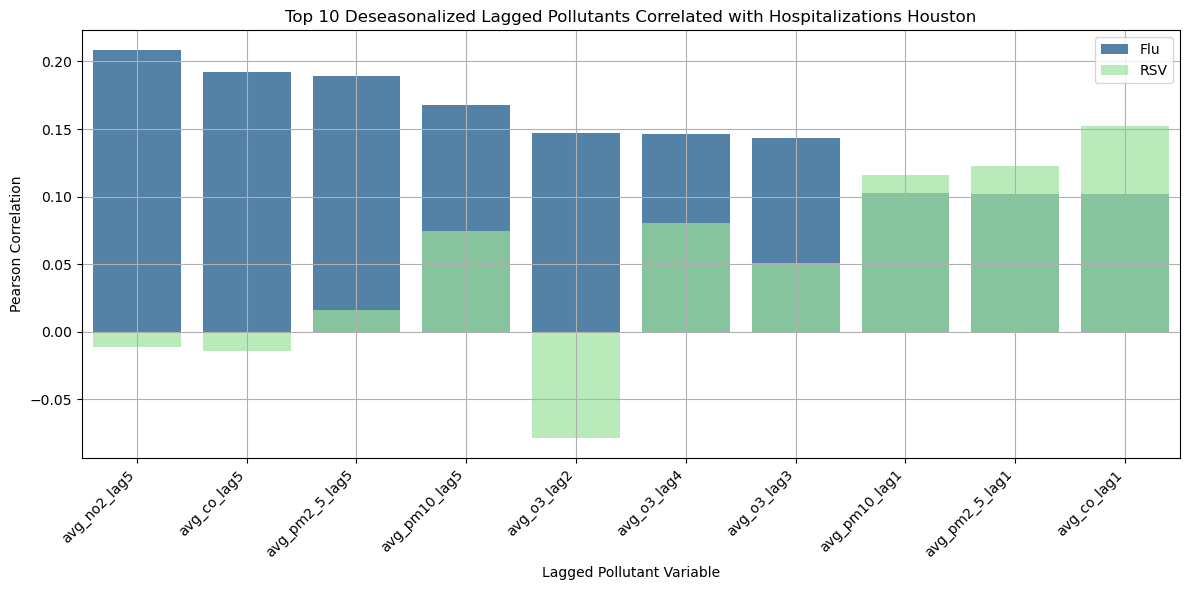

In [52]:

# Sort by Flu correlation (or RSV if preferred)
top_vars = correlation_lagged_deseason_df_houston.sort_values("Flu Corr", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vars, x="Variable", y="Flu Corr", color="steelblue", label="Flu")
sns.barplot(data=top_vars, x="Variable", y="RSV Corr", color="lightgreen", label="RSV", alpha=0.7)

plt.title("Top 10 Deseasonalized Lagged Pollutants Correlated with Hospitalizations Houston")
plt.ylabel("Pearson Correlation")
plt.xlabel("Lagged Pollutant Variable")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

StatementMeta(sparkpool, 14, 54, Finished, Available, Finished)

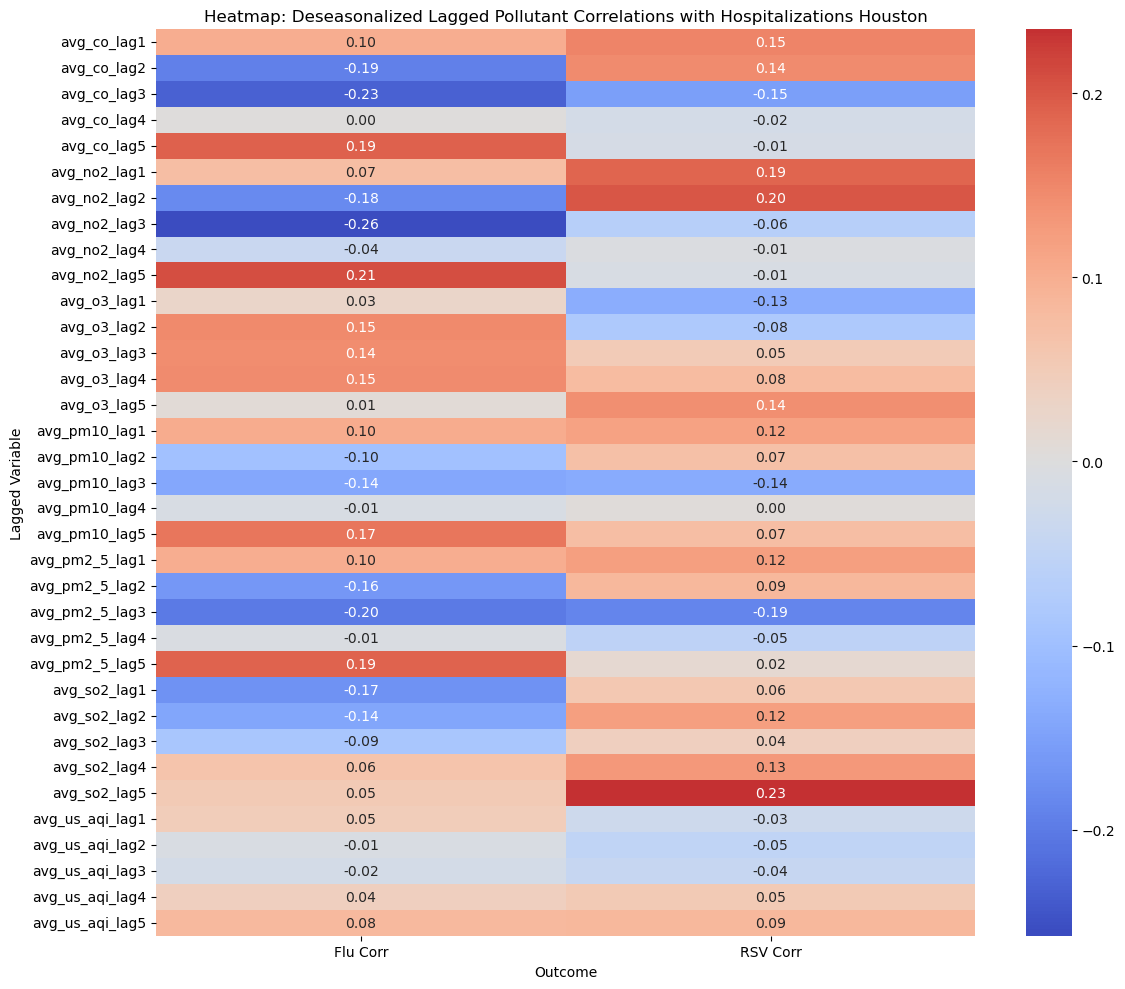

In [53]:
# Melt into long format
corr_melt = correlation_lagged_deseason_df_houston.melt(id_vars="Variable", var_name="Outcome", value_name="Correlation")

# Pivot for heatmap
corr_pivot = corr_melt.pivot(index="Variable", columns="Outcome", values="Correlation")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pivot, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap: Deseasonalized Lagged Pollutant Correlations with Hospitalizations Houston")
plt.ylabel("Lagged Variable")
plt.tight_layout()
plt.show()

StatementMeta(sparkpool, 14, 62, Finished, Available, Finished)

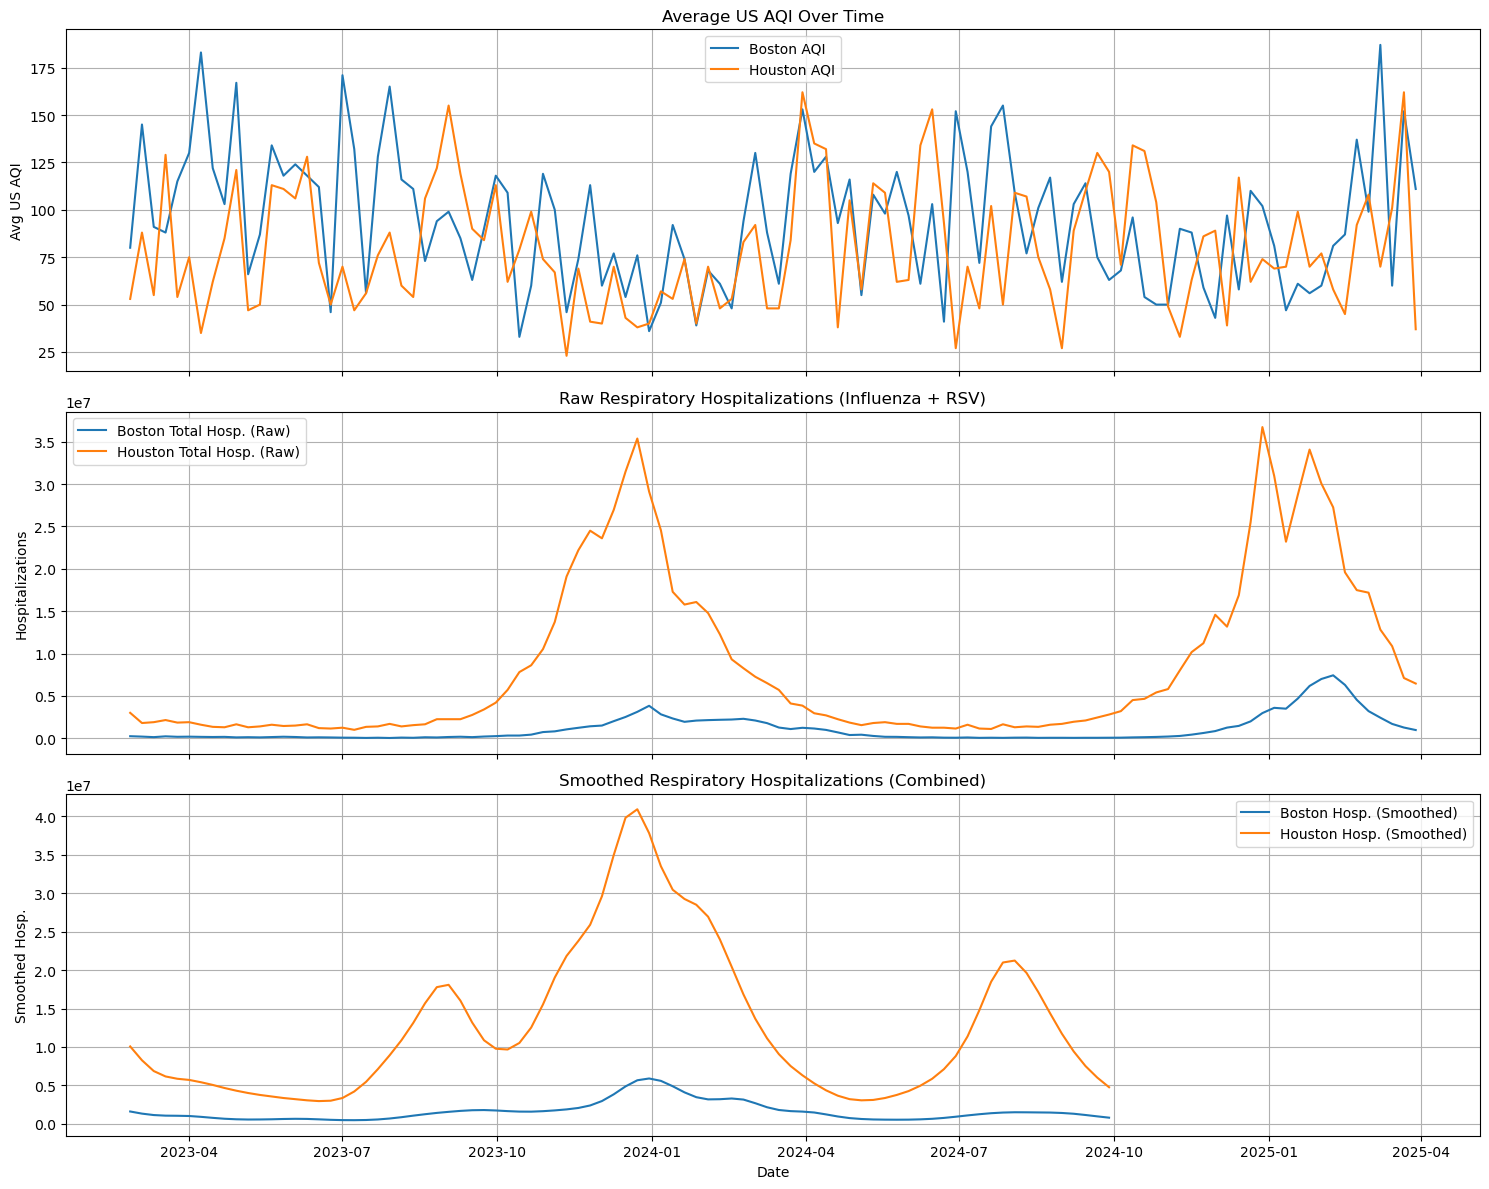

In [61]:
# Add city labels and combine
boston_pd["City"] = "Boston"
houston_pd["City"] = "Houston"
combined_df = pd.concat([boston_pd, houston_pd], ignore_index=True)

# Ensure date is datetime and sorted
combined_df["date"] = pd.to_datetime(combined_df["date"])
combined_df = combined_df.sort_values("date")

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# --- Top: AQI over time ---
for city in combined_df["City"].unique():
    city_data = combined_df[combined_df["City"] == city]
    axes[0].plot(city_data["date"], city_data["avg_us_aqi"], label=f"{city} AQI")
axes[0].set_ylabel("Avg US AQI")
axes[0].set_title("Average US AQI Over Time")
axes[0].legend()
axes[0].grid(True)

# --- Middle: Hospitalizations (Influenza + RSV) ---
for city in combined_df["City"].unique():
    city_data = combined_df[combined_df["City"] == city]
    total_hosp = city_data["total_visits_influenza"] + city_data["total_visits_rsv"]
    axes[1].plot(city_data["date"], total_hosp, label=f"{city} Total Hosp. (Raw)")
axes[1].set_ylabel("Hospitalizations")
axes[1].set_title("Raw Respiratory Hospitalizations (Influenza + RSV)")
axes[1].legend()
axes[1].grid(True)

# --- Bottom: Smoothed Hospitalizations ---
for city in combined_df["City"].unique():
    city_data = combined_df[combined_df["City"] == city]
    axes[2].plot(city_data["date"], city_data["total_visits_smoothed_combined"], label=f"{city} Hosp. (Smoothed)")
axes[2].set_ylabel("Smoothed Hosp.")
axes[2].set_xlabel("Date")
axes[2].set_title("Smoothed Respiratory Hospitalizations (Combined)")
axes[2].legend()
axes[2].grid(True)

# Final layout
plt.tight_layout()
plt.show()
